# Libraries import

In [116]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import time
import random
import numpy as np
import re
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# Data Acquisition
Data Acquisition by Manufacturer and Merging
This code section focuses on acquiring data for different car manufacturers separately and then merging the data into a single file. The code follows a similar process for each manufacturer, such as BMW, Chevrolet, and more.
Manufacturer-Specific Data Acquisition: The code generates URLs for each manufacturer on the Autotrader website, specifying the location, search parameters, and desired number of records. It iterates through multiple pages and extracts the links to individual car pages for the specific manufacturer.
Data Storage: The extracted links for each manufacturer are stored in separate lists or arrays to keep track of the data.
Merging the Data: Once the data acquisition is complete for each manufacturer, the code merges the separate lists or arrays into a single consolidated dataset.
The second part of code iterates through the links to individual car pages.
It constructs the complete URL for each car page and sends a request to retrieve the HTML content.
The code extracts specific details such as the car name and price from the HTML using BeautifulSoup.
If additional details are available, they are also extracted and added to the data list.
If any information is missing or not found, 'N/A' is appended to maintain consistent data structure.
By executing this code, the data list will contain the extracted information for each car, allowing for further analysis, preprocessing, and modeling.

### BMW

In [ ]:
linksToPages = []

for i in range(0, 1000, 100):
    if i==0:
        url = "https://www.autotrader.com/cars-for-sale/all-cars/Bmw/san-francisco-ca?searchRadius=75&zip=94102&marketExtension=include&isNewSearch=true&showAccelerateBanner=false&sortBy=relevance&numRecords=100"
      
    else:
        url = f"https://www.autotrader.com/cars-for-sale/all-cars/Bmw/san-francisco-ca?searchRadius=75&zip=94102&marketExtension=include&isNewSearch=true&showAccelerateBanner=false&sortBy=relevance&numRecords=100&firstRecord={i}"

    response = requests.get(url)
    page_source = response.text

    soup = bs(page_source, 'html.parser')
    my_divs = soup.find_all('div', attrs={'class': "inventory-listing cursor-pointer panel panel-default"})

    for div in my_divs:
        for t in div.find_all('a'):
            linksToPages.append(t['href'])
            break
    time.sleep(2)

linksToPages

In [3]:

data = []
for link in linksToPages:
    if link.startswith('/'):
        url = 'https://www.autotrader.com' + link
        res = requests.get(url)
        time.sleep(2)
        soup = bs(res.content, 'html.parser')
        items = soup.find('ul', attrs={'class': 'list'})
        data_row = []

        # Extract name if it is not None
        name = soup.find('h1')
        if name is not None:
            data_row.append(name.text.strip())
        else:
            data_row.append('N/A')

        # Extract price
        price = soup.find('div', attrs={'data-cmp': 'pricing'})
        if price is not None:
            price_value = price.find('span', attrs={'class': 'first-price'})
            if price_value is not None:
                data_row.append(price_value.text.strip())
            else:
                data_row.append('N/A')
        else:
            data_row.append('N/A')

        # Extract other details if items is not None
        if items is not None:
            for item in items.find_all("li", attrs={'class': 'list-bordered'}):
                data_row.append(item.text.strip())
        else:
            # Append 'N/A' values if no other details are found
            for _ in range(6):
                data_row.append('N/A')

        data.append(data_row)



# Save DataFrame as Excel file
#save_location = r"C:\Users\tal66\Desktop\פרויקט טל ושקד מדעי הנתונים\runs\BMW.xlsx"
#df.to_excel(save_location, index=False)

In [4]:
df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7,8,9
0,Used 2020 BMW X1 sDrive28i w/ Convenience Package,"29,888","20,119 miles",2.0L 4-Cylinder Turbo Gas Engine,24 City / 33 Highway,Alpine White Exterior,Black Sensatec Interior,8-Speed Automatic Transmission,2 wheel drive - front,None
1,Used 2018 BMW 320i Sedan,"24,997","27,659 miles",2.0L 4-Cylinder Turbo Gas Engine,24 City / 35 Highway,Mineral White Metallic Exterior,Leather Black/Red Hghlgt/Stitc Leather Seats,8-Speed Automatic Transmission,2 wheel drive - rear,None
2,Certified 2020 BMW 228i xDrive w/ Convenience ...,"29,998","19,102 miles",2.0L 4-Cylinder Turbo Gas Engine,23 City / 33 Highway,Alpine White Exterior,Black Sensatec Interior,8-Speed Automatic Transmission,All wheel drive,None
3,Certified 2020 BMW X1 sDrive28i w/ Convenience...,"30,999","21,068 miles",2.0L 4-Cylinder Turbo Gas Engine,24 City / 33 Highway,Mineral White Metallic Exterior,Black Sensatec Interior,8-Speed Automatic Transmission,2 wheel drive - front,None
4,Certified 2020 BMW X1 sDrive28i w/ Premium Pac...,"31,587","18,865 miles",2.0L 4-Cylinder Turbo Gas Engine,24 City / 33 Highway,Mineral Grey Metallic Exterior,Black Sensatec Interior,8-Speed Automatic Transmission,2 wheel drive - front,None
...,...,...,...,...,...,...,...,...,...,...
995,Used 2020 BMW 530e,"28,699","79,505 miles",Plug-in Hybrid: Gas/Electric,Information Unavailable,21 EV Mile Range,Mediterranean Blue Metallic Exterior,Canberra Beige/Black Interior,8-Speed Automatic Transmission,2 wheel drive - rear
996,Used 2020 BMW X5 sDrive40i w/ Premium Package,"43,987","29,231 miles",3.0L 6-Cylinder Turbo Gas Engine,21 City / 26 Highway,Arctic Gray Metallic Exterior,Ivory White Interior,8-Speed Automatic Transmission,2 wheel drive - rear,None
997,Used 2022 BMW M5 w/ Competition Package,"102,987","15,364 miles",4.4L 8-Cylinder Turbo Gas Engine,15 City / 21 Highway,Brands Hatch Grey Metallic Exterior,Silverstone Leather Seats,8-Speed Automatic Transmission,All wheel drive,None
998,Used 2016 BMW 528i Sedan,"19,500","65,657 miles",2.0L 4-Cylinder Turbo Gas Engine,23 City / 34 Highway,Alpine White Exterior,Black Interior,8-Speed Automatic Transmission,2 wheel drive - rear,None


### Chevrolet

In [5]:
#chevrolet
linksToPages = []

for i in range(0, 1000, 100):
    if i==0:
        url = "https://www.autotrader.com/cars-for-sale/all-cars/chevrolet/san-francisco-ca?searchRadius=75&zip=94102&marketExtension=include&isNewSearch=true&showAccelerateBanner=false&sortBy=relevance&numRecords=100"
      
    else:
        url = f"https://www.autotrader.com/cars-for-sale/all-cars/chevrolet/san-francisco-ca?searchRadius=75&zip=94102&marketExtension=include&isNewSearch=true&showAccelerateBanner=false&sortBy=relevance&numRecords=100&firstRecord={i}"

    response = requests.get(url)
    page_source = response.text

    soup = bs(page_source, 'html.parser')
    my_divs = soup.find_all('div', attrs={'class': "inventory-listing cursor-pointer panel panel-default"})

    for div in my_divs:
        for t in div.find_all('a'):
            linksToPages.append(t['href'])
            break
    time.sleep(2)

In [ ]:
 linksToPages

In [7]:

data = []
for link in linksToPages:
    if link.startswith('/'):
        url = 'https://www.autotrader.com' + link
        res = requests.get(url)
        time.sleep(2)
        soup = bs(res.content, 'html.parser')
        items = soup.find('ul', attrs={'class': 'list'})
        data_row = []

        # Extract name if it is not None
        name = soup.find('h1')
        if name is not None:
            data_row.append(name.text.strip())
        else:
            data_row.append('N/A')

        # Extract price
        price = soup.find('div', attrs={'data-cmp': 'pricing'})
        if price is not None:
            price_value = price.find('span', attrs={'class': 'first-price'})
            if price_value is not None:
                data_row.append(price_value.text.strip())
            else:
                data_row.append('N/A')
        else:
            data_row.append('N/A')

        # Extract other details if items is not None
        if items is not None:
            for item in items.find_all("li", attrs={'class': 'list-bordered'}):
                data_row.append(item.text.strip())
        else:
            # Append 'N/A' values if no other details are found
            for _ in range(6):
                data_row.append('N/A')

        data.append(data_row)



# Save DataFrame as Excel file
#save_location = r"C:\Users\tal66\Desktop\פרויקט טל ושקד מדעי הנתונים\runs\chevrolet.xlsx"
#df.to_excel(save_location, index=False)


In [8]:
df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7,8,9
0,Used 1999 Chevrolet Corvette Convertible w/ Me...,"14,750","61,632 miles",5.7L 8-Cylinder Gas Engine,15 City / 23 Highway,Sebring Silver Metallic Exterior,Black Leather Seats,4-Speed Automatic Transmission,2 wheel drive - rear,None
1,Used 2022 Chevrolet Bolt EUV Premier w/ Sun & ...,"33,495","6,251 miles",Electric Engine,247 EV Mile Range,Gray Ghost Metallic Exterior,Dark Ash Gray Sky Gray Leather Seats,Single-Speed Transmission,2 wheel drive - front,None
2,Used 2019 Chevrolet Corvette Stingray Coupe w/...,"50,900","27,262 miles",6.2L 8-Cylinder Gas Engine,15 City / 25 Highway,Ceramic Matrix Gray Metallic Exterior,Jet Black Leather Seats,8-Speed Automatic Transmission,2 wheel drive - rear,None
3,Used 2014 Chevrolet Camaro LT,"22,000","32,688 miles",3.6L 6-Cylinder Gas Engine,Information Unavailable,Bright Yellow Exterior,Black Interior,6-Speed Automatic Transmission,2 wheel drive - rear,None
4,Used 2019 Chevrolet Bolt LT,"23,987","23,358 miles",Electric Engine,238 EV Mile Range,Summit White Exterior,Dark Galvanized/Sky Cool Gray Interior,Single-Speed Transmission,2 wheel drive - front,None
...,...,...,...,...,...,...,...,...,...,...
995,Used 2015 Chevrolet Silverado 1500 LTZ w/ LTZ ...,"29,888","96,671 miles",5.3L 8-Cylinder Gas Engine,16 City / 23 Highway,White Diamond Tricoat Exterior,Dark Ash With Jet Black Leather Seats,6-Speed Automatic Transmission,2 wheel drive - rear,"5'10"" Bed Length (Extra Short)"
996,Used 2017 Chevrolet Silverado 1500 LT w/ All S...,"39,454","65,939 miles",5.3L 8-Cylinder Gas Engine,16 City / 22 Highway,Silver Ice Metallic Exterior,Black Interior,6-Speed Automatic Transmission,4 wheel drive,"5'10"" Bed Length (Extra Short)"
997,Used 2017 Chevrolet Volt Premier w/ Driver Con...,"21,500","60,375 miles",Plug-in Hybrid: Gas/Electric,43 City / 42 Highway,53 EV Mile Range,Heather Gray Metallic Exterior,Black Interior,Continuously Variable Automatic Transmission,2 wheel drive - front
998,Certified 2019 Chevrolet Traverse LS,"28,988","46,773 miles",3.6L 6-Cylinder Gas Engine,18 City / 27 Highway,Silver Ice Metallic Exterior,Jet Black Interior,9-Speed Automatic Transmission,2 wheel drive - front,None


### Ford

In [9]:
#Ford
linksToPages = []

for i in range(0, 1000, 100):
    if i==0:
        url = "https://www.autotrader.com/cars-for-sale/all-cars/Ford/san-francisco-ca?searchRadius=75&zip=94102&marketExtension=include&isNewSearch=true&showAccelerateBanner=false&sortBy=relevance&numRecords=100"
      
    else:
        url = f"https://www.autotrader.com/cars-for-sale/all-cars/Ford/san-francisco-ca?searchRadius=75&zip=94102&marketExtension=include&isNewSearch=true&showAccelerateBanner=false&sortBy=relevance&numRecords=100&firstRecord={i}"

    response = requests.get(url)
    page_source = response.text

    soup = bs(page_source, 'html.parser')
    my_divs = soup.find_all('div', attrs={'class': "inventory-listing cursor-pointer panel panel-default"})

    for div in my_divs:
        for t in div.find_all('a'):
            linksToPages.append(t['href'])
            break
    time.sleep(2)

In [ ]:
linksToPages

In [11]:

data = []
for link in linksToPages:
    if link.startswith('/'):
        url = 'https://www.autotrader.com' + link
        res = requests.get(url)
        time.sleep(2)
        soup = bs(res.content, 'html.parser')
        items = soup.find('ul', attrs={'class': 'list'})
        data_row = []

        # Extract name if it is not None
        name = soup.find('h1')
        if name is not None:
            data_row.append(name.text.strip())
        else:
            data_row.append('N/A')

        # Extract price
        price = soup.find('div', attrs={'data-cmp': 'pricing'})
        if price is not None:
            price_value = price.find('span', attrs={'class': 'first-price'})
            if price_value is not None:
                data_row.append(price_value.text.strip())
            else:
                data_row.append('N/A')
        else:
            data_row.append('N/A')

        # Extract other details if items is not None
        if items is not None:
            for item in items.find_all("li", attrs={'class': 'list-bordered'}):
                data_row.append(item.text.strip())
        else:
            # Append 'N/A' values if no other details are found
            for _ in range(6):
                data_row.append('N/A')

        data.append(data_row)



# Save DataFrame as Excel file
#save_location = r"C:\Users\tal66\Desktop\פרויקט טל ושקד מדעי הנתונים\runs\Ford.xlsx"
#df.to_excel(save_location, index=False)


In [12]:
df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7,8,9,10
0,Certified 2020 Ford Edge Titanium w/ Equipment...,"31,491","26,278 miles",2.0L 4-Cylinder Turbo Gas Engine,21 City / 28 Highway,Atlas Blue Metallic Exterior,Ebony Leather Seats,8-Speed Automatic Transmission,All wheel drive,View Original Window Sticker,None
1,Used 2018 Ford Escape SE w/ SE Sync 3 Package,"15,498","74,184 miles",1.5L 4-Cylinder Turbo Gas Engine,23 City / 30 Highway,Ruby Red Metallic Tinted Clearcoat Exterior,Charcoal Black Interior,6-Speed Automatic Transmission,2 wheel drive - front,None,None
2,Used 2020 Ford Explorer XLT w/ Equipment Group...,"32,374","12,155 miles",2.3L 4-Cylinder Turbo Gas Engine,21 City / 28 Highway,Magnetic Exterior,Ebony With Light Slate Uppers Leather Seats,10-Speed Automatic Transmission,2 wheel drive - rear,None,None
3,Used 2020 Ford Ranger XL w/ Equipment Group 10...,"32,000","17,816 miles",2.3L 4-Cylinder Turbo Gas Engine,21 City / 26 Highway,Magnetic Metallic Exterior,Ebony Interior,10-Speed Automatic Transmission,2 wheel drive - rear,"5'1"" Bed Length (Short)",None
4,Used 2018 Ford Escape Titanium w/ Ford Safe & ...,"22,999","35,309 miles",2.0L 4-Cylinder Turbo Gas Engine,20 City / 27 Highway,Ruby Red Metallic Tinted Clearcoat Exterior,Charcoal Black Leather Seats,6-Speed Automatic Transmission,4 wheel drive,None,None
...,...,...,...,...,...,...,...,...,...,...,...
995,Used 2015 Ford Transit Connect XLT,"21,999","64,804 miles",2.5L 4-Cylinder Gas Engine,21 City / 28 Highway,White Exterior,Black Interior,6-Speed Automatic Transmission,2 wheel drive - front,None,None
996,Used 2014 Ford Taurus SE,"10,989","133,930 miles",3.5L 6-Cylinder Gas Engine,19 City / 28 Highway,Silver Exterior,No Color Interior,6-Speed Automatic Transmission,2 wheel drive - front,None,None
997,Used 2020 Ford EcoSport SE,"18,500","51,270 miles",2.0L 4-Cylinder Gas Engine,23 City / 29 Highway,6-Speed Automatic Transmission,4 wheel drive,None,None,None,None
998,Used 2021 Ford Edge SEL,"27,000","53,966 miles",2.0L 4-Cylinder Turbo Gas Engine,21 City / 28 Highway,8-Speed Automatic Transmission,All wheel drive,None,None,None,None


### GMC

In [13]:
#GMC
linksToPages = []

for i in range(0, 1000, 100):
    if i==0:
        url = "https://www.autotrader.com/cars-for-sale/all-cars/GMC/san-francisco-ca?searchRadius=75&zip=94102&marketExtension=include&isNewSearch=true&showAccelerateBanner=false&sortBy=relevance&numRecords=100"
      
    else:
        url = f"https://www.autotrader.com/cars-for-sale/all-cars/GMC/san-francisco-ca?searchRadius=75&zip=94102&marketExtension=include&isNewSearch=true&showAccelerateBanner=false&sortBy=relevance&numRecords=100&firstRecord={i}"

    response = requests.get(url)
    page_source = response.text

    soup = bs(page_source, 'html.parser')
    my_divs = soup.find_all('div', attrs={'class': "inventory-listing cursor-pointer panel panel-default"})

    for div in my_divs:
        for t in div.find_all('a'):
            linksToPages.append(t['href'])
            break
    time.sleep(2)

In [ ]:
linksToPages

In [15]:



data = []
for link in linksToPages:
    if link.startswith('/'):
        url = 'https://www.autotrader.com' + link
        res = requests.get(url)
        time.sleep(2)
        soup = bs(res.content, 'html.parser')
        items = soup.find('ul', attrs={'class': 'list'})
        data_row = []

        # Extract name if it is not None
        name = soup.find('h1')
        if name is not None:
            data_row.append(name.text.strip())
        else:
            data_row.append('N/A')

        # Extract price
        price = soup.find('div', attrs={'data-cmp': 'pricing'})
        if price is not None:
            price_value = price.find('span', attrs={'class': 'first-price'})
            if price_value is not None:
                data_row.append(price_value.text.strip())
            else:
                data_row.append('N/A')
        else:
            data_row.append('N/A')

        # Extract other details if items is not None
        if items is not None:
            for item in items.find_all("li", attrs={'class': 'list-bordered'}):
                data_row.append(item.text.strip())
        else:
            # Append 'N/A' values if no other details are found
            for _ in range(6):
                data_row.append('N/A')

        data.append(data_row)


# Save DataFrame as Excel file
#save_location = r"C:\Users\tal66\Desktop\פרויקט טל ושקד מדעי הנתונים\runs\GMC.xlsx"
#df.to_excel(save_location, index=False)


In [16]:
df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7,8,9
0,Used 2019 GMC Acadia Denali w/ Technology Package,"35,900","38,105 miles",3.6L 6-Cylinder Gas Engine,17 City / 25 Highway,Ebony Twilight Metallic Exterior,Jet Black Leather Seats,6-Speed Automatic Transmission,All wheel drive,None
1,Used 2017 GMC Acadia Denali w/ Technology Package,"25,888","61,915 miles",3.6L 6-Cylinder Gas Engine,18 City / 25 Highway,Black Cherry Metallic Exterior,Jet Black Leather Seats,6-Speed Automatic Transmission,All wheel drive,None
2,Certified 2020 GMC Acadia AT4,"35,974","28,968 miles",3.6L 6-Cylinder Gas Engine,18 City / 25 Highway,Quicksilver Metallic Exterior,Jet Black Interior,9-Speed Automatic Transmission,All wheel drive,None
3,Used 2022 GMC Canyon AT4 w/ Driver Alert Package,"41,783","10,053 miles",3.6L 6-Cylinder Gas Engine,17 City / 24 Highway,Summit White Exterior,Jet Black/Kalahari Leather Seats,8-Speed Automatic Transmission,4 wheel drive,"5'1"" Bed Length (Short)"
4,Used 2022 GMC Terrain Denali w/ Denali Premium...,"34,000","5,320 miles",1.5L 4-Cylinder Turbo Gas Engine,25 City / 28 Highway,Ebony Twilight Metallic Exterior,Jet Black Leather Seats,9-Speed Automatic Transmission,All wheel drive,None
...,...,...,...,...,...,...,...,...,...,...
995,New 2024 GMC Sierra 2500 Pro w/ Convenience Pa...,"51,825MSRP",2 miles,6.6L 8-Cylinder Gas Engine,Information Unavailable,Summit White Exterior,Black Interior,10-Speed Automatic Transmission,4 wheel drive,"8'2"" Bed Length (Long)"
996,New 2023 GMC Canyon Elevation,"41,695MSRP",0 miles,2.7L 4-Cylinder Turbo Gas Engine,Information Unavailable,Summit White Exterior,Jet Black Cloth Seat Trim,8-Speed Automatic Transmission,4 wheel drive,"5'1"" Bed Length (Short)"
997,New 2023 GMC Canyon Elevation,"42,190MSRP",0 miles,2.7L 4-Cylinder Turbo Gas Engine,Information Unavailable,Onyx Black Exterior,Jet Black Cloth Seat Trim,8-Speed Automatic Transmission,4 wheel drive,"5'1"" Bed Length (Short)"
998,New 2023 GMC Canyon Elevation w/ Convenience P...,"44,075MSRP",0 miles,2.7L 4-Cylinder Turbo Gas Engine,Information Unavailable,Summit White Exterior,Jet Black Cloth Seat Trim,8-Speed Automatic Transmission,2 wheel drive - rear,"5'1"" Bed Length (Short)"


### Honda

In [17]:
#Honda
linksToPages = []

for i in range(0, 1000, 100):
    if i==0:
        url = "https://www.autotrader.com/cars-for-sale/all-cars/Honda/san-francisco-ca?searchRadius=75&zip=94102&marketExtension=include&isNewSearch=true&showAccelerateBanner=false&sortBy=relevance&numRecords=100"
      
    else:
        url = f"https://www.autotrader.com/cars-for-sale/all-cars/Honda/san-francisco-ca?searchRadius=75&zip=94102&marketExtension=include&isNewSearch=true&showAccelerateBanner=false&sortBy=relevance&numRecords=100&firstRecord={i}"

    response = requests.get(url)
    page_source = response.text

    soup = bs(page_source, 'html.parser')
    my_divs = soup.find_all('div', attrs={'class': "inventory-listing cursor-pointer panel panel-default"})

    for div in my_divs:
        for t in div.find_all('a'):
            linksToPages.append(t['href'])
            break
    time.sleep(2)

In [ ]:
linksToPages

In [19]:

data = []
for link in linksToPages:
    if link.startswith('/'):
        url = 'https://www.autotrader.com' + link
        res = requests.get(url)
        time.sleep(2)
        soup = bs(res.content, 'html.parser')
        items = soup.find('ul', attrs={'class': 'list'})
        data_row = []

        # Extract name if it is not None
        name = soup.find('h1')
        if name is not None:
            data_row.append(name.text.strip())
        else:
            data_row.append('N/A')

        # Extract price
        price = soup.find('div', attrs={'data-cmp': 'pricing'})
        if price is not None:
            price_value = price.find('span', attrs={'class': 'first-price'})
            if price_value is not None:
                data_row.append(price_value.text.strip())
            else:
                data_row.append('N/A')
        else:
            data_row.append('N/A')

        # Extract other details if items is not None
        if items is not None:
            for item in items.find_all("li", attrs={'class': 'list-bordered'}):
                data_row.append(item.text.strip())
        else:
            # Append 'N/A' values if no other details are found
            for _ in range(6):
                data_row.append('N/A')

        data.append(data_row)



# Save DataFrame as Excel file
#save_location = r"C:\Users\tal66\Desktop\פרויקט טל ושקד מדעי הנתונים\runs\Honda.xlsx"
#df.to_excel(save_location, index=False)


In [20]:
df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7,8,9
0,Used 2022 Honda Civic Si,"34,991","7,833 miles",1.5L 4-Cylinder Turbo Gas Engine,27 City / 37 Highway,Blazing Orange Pearl Exterior,Black Interior,6-Speed Manual Transmission,2 wheel drive - front,None
1,Used 2020 Honda CR-V EX,"28,483","28,914 miles",1.5L 4-Cylinder Turbo Gas Engine,28 City / 34 Highway,Platinum White Pearl Exterior,Black Interior,Continuously Variable Automatic Transmission,2 wheel drive - front,None
2,Used 2014 Honda Civic LX,"14,975","56,885 miles",1.8L 4-Cylinder Gas Engine,29 City / 37 Highway,Maroon Exterior,Tan Interior,Continuously Variable Automatic Transmission,2 wheel drive - front,None
3,Used 2018 Honda Civic LX,"20,991","43,135 miles",2.0L 4-Cylinder Gas Engine,31 City / 40 Highway,White Exterior,Black/Ivory Interior,Continuously Variable Automatic Transmission,2 wheel drive - front,None
4,Used 2019 Honda CR-V EX,"27,991","38,190 miles",1.5L 4-Cylinder Turbo Gas Engine,27 City / 33 Highway,Modern Steel Metallic Exterior,Gray Interior,Continuously Variable Automatic Transmission,All wheel drive,None
...,...,...,...,...,...,...,...,...,...,...
995,Certified 2021 Honda Civic Sport,"29,995","22,957 miles",2.0L 4-Cylinder Gas Engine,29 City / 37 Highway,Silver Exterior,Black Interior,Continuously Variable Automatic Transmission,2 wheel drive - front,None
996,Certified 2021 Honda Civic Sport,"30,995","28,204 miles",1.5L 4-Cylinder Turbo Gas Engine,29 City / 35 Highway,Platinum White Pearl Exterior,Black Interior,Continuously Variable Automatic Transmission,2 wheel drive - front,None
997,Certified 2022 Honda Accord Sport,"36,995","12,115 miles",Hybrid: Gas/Electric,44 City / 41 Highway,White Exterior,Black Interior,Continuously Variable Automatic Transmission,2 wheel drive - front,None
998,Used 2017 Honda CR-V Touring,"24,995","75,676 miles",1.5L 4-Cylinder Turbo Gas Engine,28 City / 34 Highway,Continuously Variable Automatic Transmission,2 wheel drive - front,None,None,None


### Jeep

In [21]:
#Jeep
linksToPages = []

for i in range(0, 1000, 100):
    if i==0:
        url = "https://www.autotrader.com/cars-for-sale/all-cars/Jeep/san-francisco-ca?searchRadius=75&zip=94102&marketExtension=include&isNewSearch=true&showAccelerateBanner=false&sortBy=relevance&numRecords=100"
      
    else:
        url = f"https://www.autotrader.com/cars-for-sale/all-cars/Jeep/san-francisco-ca?searchRadius=75&zip=94102&marketExtension=include&isNewSearch=true&showAccelerateBanner=false&sortBy=relevance&numRecords=100&firstRecord={i}"

    response = requests.get(url)
    page_source = response.text

    soup = bs(page_source, 'html.parser')
    my_divs = soup.find_all('div', attrs={'class': "inventory-listing cursor-pointer panel panel-default"})

    for div in my_divs:
        for t in div.find_all('a'):
            linksToPages.append(t['href'])
            break
    time.sleep(2)

In [ ]:
linksToPages

In [23]:

data = []
for link in linksToPages:
    if link.startswith('/'):
        url = 'https://www.autotrader.com' + link
        res = requests.get(url)
        time.sleep(2)
        soup = bs(res.content, 'html.parser')
        items = soup.find('ul', attrs={'class': 'list'})
        data_row = []

        # Extract name if it is not None
        name = soup.find('h1')
        if name is not None:
            data_row.append(name.text.strip())
        else:
            data_row.append('N/A')

        # Extract price
        price = soup.find('div', attrs={'data-cmp': 'pricing'})
        if price is not None:
            price_value = price.find('span', attrs={'class': 'first-price'})
            if price_value is not None:
                data_row.append(price_value.text.strip())
            else:
                data_row.append('N/A')
        else:
            data_row.append('N/A')

        # Extract other details if items is not None
        if items is not None:
            for item in items.find_all("li", attrs={'class': 'list-bordered'}):
                data_row.append(item.text.strip())
        else:
            # Append 'N/A' values if no other details are found
            for _ in range(6):
                data_row.append('N/A')

        data.append(data_row)



# Save DataFrame as Excel file
#save_location = r"C:\Users\tal66\Desktop\פרויקט טל ושקד מדעי הנתונים\runs\Mercedes benz.xlsx"
#df.to_excel(save_location, index=False)


In [24]:
df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7,8,9,10
0,Used 2021 Jeep Wrangler Rubicon,"44,999","11,247 miles",3.6L 6-Cylinder Gas Engine,Information Unavailable,Firecracker Red Clearcoat Exterior,Dark Saddle/Black Leather Seats,8-Speed Automatic Transmission,4 wheel drive,None,None
1,Used 2021 Jeep Grand Cherokee Laredo,"27,900","16,220 miles",3.6L 6-Cylinder Gas Engine,19 City / 26 Highway,Bright White Clearcoat Exterior,Black Interior,8-Speed Automatic Transmission,2 wheel drive - rear,None,None
2,Used 2020 Jeep Gladiator Overland w/ LED Light...,"39,900","23,339 miles",3.6L 6-Cylinder Gas Engine,17 City / 22 Highway,Black Clearcoat Exterior,Dark Saddle/Black Leather Seats,8-Speed Automatic Transmission,4 wheel drive,5' Bed Length (Short),None
3,Used 2020 Jeep Compass Limited w/ Safety & Sec...,"26,900","16,908 miles",2.4L 4-Cylinder Gas Engine,22 City / 30 Highway,Sting-Gray Clearcoat Exterior,Black Leather Seats,9-Speed Automatic Transmission,4 wheel drive,None,None
4,Used 2018 Jeep Compass Limited w/ Navigation G...,"24,900","23,345 miles",2.4L 4-Cylinder Gas Engine,22 City / 30 Highway,Billet Silver Metallic Clearcoat Exterior,Black Leather Seats,9-Speed Automatic Transmission,4 wheel drive,None,None
...,...,...,...,...,...,...,...,...,...,...,...
995,New 2023 Jeep Grand Cherokee Laredo,"48,430",20 miles,3.6L 6-Cylinder Gas Engine,19 City / 26 Highway,Baltic Gray Metallic Clearcoat Exterior,Global Black Interior,8-Speed Automatic Transmission,4 wheel drive,None,None
996,New 2023 Jeep Wrangler Unlimited,"48,920",10 miles,Plug-in Hybrid: Gas/Electric,Information Unavailable,22 EV Mile Range,White Knuckle Clearcoat Exterior,Black Interior,8-Speed Automatic Transmission,4 wheel drive,None
997,New 2023 Jeep Wrangler Unlimited,"48,920",10 miles,Plug-in Hybrid: Gas/Electric,Information Unavailable,22 EV Mile Range,White Knuckle Clearcoat Exterior,Black Interior,8-Speed Automatic Transmission,4 wheel drive,None
998,New 2023 Jeep Wrangler Unlimited,"49,415",10 miles,Plug-in Hybrid: Gas/Electric,Information Unavailable,22 EV Mile Range,Earl Clearcoat Exterior,Black Interior,8-Speed Automatic Transmission,4 wheel drive,None


### Lexus

In [25]:
#Lexus
linksToPages = []

for i in range(0, 1000, 100):
    if i==0:
        url = "https://www.autotrader.com/cars-for-sale/all-cars/Lexus/san-francisco-ca?searchRadius=75&zip=94102&marketExtension=include&isNewSearch=true&showAccelerateBanner=false&sortBy=relevance&numRecords=100"
      
    else:
        url = f"https://www.autotrader.com/cars-for-sale/all-cars/Lexus/san-francisco-ca?searchRadius=75&zip=94102&marketExtension=include&isNewSearch=true&showAccelerateBanner=false&sortBy=relevance&numRecords=100&firstRecord={i}"

    response = requests.get(url)
    page_source = response.text

    soup = bs(page_source, 'html.parser')
    my_divs = soup.find_all('div', attrs={'class': "inventory-listing cursor-pointer panel panel-default"})

    for div in my_divs:
        for t in div.find_all('a'):
            linksToPages.append(t['href'])
            break
    time.sleep(2)

In [ ]:
linksToPages

In [27]:

data = []
for link in linksToPages:
    if link.startswith('/'):
        url = 'https://www.autotrader.com' + link
        res = requests.get(url)
        time.sleep(2)
        soup = bs(res.content, 'html.parser')
        items = soup.find('ul', attrs={'class': 'list'})
        data_row = []

        # Extract name if it is not None
        name = soup.find('h1')
        if name is not None:
            data_row.append(name.text.strip())
        else:
            data_row.append('N/A')

        # Extract price
        price = soup.find('div', attrs={'data-cmp': 'pricing'})
        if price is not None:
            price_value = price.find('span', attrs={'class': 'first-price'})
            if price_value is not None:
                data_row.append(price_value.text.strip())
            else:
                data_row.append('N/A')
        else:
            data_row.append('N/A')

        # Extract other details if items is not None
        if items is not None:
            for item in items.find_all("li", attrs={'class': 'list-bordered'}):
                data_row.append(item.text.strip())
        else:
            # Append 'N/A' values if no other details are found
            for _ in range(6):
                data_row.append('N/A')

        data.append(data_row)



# Save DataFrame as Excel file
#save_location = r"C:\Users\tal66\Desktop\פרויקט טל ושקד מדעי הנתונים\runs\Lexus.xlsx"
#df.to_excel(save_location, index=False)


In [28]:
df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7,8,9
0,Used 2016 Lexus ES 350,"23,999","81,979 miles",3.5L 6-Cylinder Gas Engine,21 City / 31 Highway,Silver Lining Metallic Exterior,Black Interior,6-Speed Automatic Transmission,2 wheel drive - front,None
1,Used 2018 Lexus IS 300,"31,265","30,774 miles",2.0L 4-Cylinder Turbo Gas Engine,22 City / 32 Highway,Eminent White Pearl Exterior,Black Interior,8-Speed Automatic Transmission,2 wheel drive - rear,None
2,Used 2019 Lexus ES 350 w/ Accessory Package 2,"38,990","23,843 miles",3.5L 6-Cylinder Gas Engine,22 City / 33 Highway,Silver Lining Metallic Exterior,Black Interior,8-Speed Automatic Transmission,2 wheel drive - front,None
3,Used 2017 Lexus RX 350 F Sport,"32,976","82,239 miles",3.5L 6-Cylinder Gas Engine,19 City / 26 Highway,Ultra White Exterior,Rioja Red Leather Seats,8-Speed Automatic Transmission,All wheel drive,None
4,Used 2016 Lexus IS 200t,"23,999","69,881 miles",2.0L 4-Cylinder Turbo Gas Engine,22 City / 32 Highway,Gray Exterior,Black Interior,8-Speed Automatic Transmission,2 wheel drive - rear,None
...,...,...,...,...,...,...,...,...,...,...
995,New 2023 Lexus RX 350h FWD,"57,105MSRP",0 miles,Hybrid: Gas/Electric,37 City / 34 Highway,Nebula Gray Pearl Exterior,Black Interior,Continuously Variable Automatic Transmission,All wheel drive,None
996,New 2023 Lexus RX 350h FWD,"59,865MSRP",0 miles,Hybrid: Gas/Electric,37 City / 34 Highway,Caviar Exterior,Black Leather Seats,Continuously Variable Automatic Transmission,All wheel drive,None
997,New 2023 Lexus RX 350h FWD,"60,090MSRP",0 miles,Hybrid: Gas/Electric,37 City / 34 Highway,Nebula Gray Pearl Exterior,Birch Leather Seats,Continuously Variable Automatic Transmission,All wheel drive,None
998,New 2023 Lexus RX 350 FWD,"63,290MSRP",0 miles,2.4L 4-Cylinder Turbo Gas Engine,22 City / 29 Highway,Copper Crest Exterior,Black Interior,8-Speed Shiftable Automatic Transmission,2 wheel drive - front,None


### Mercedes benz

In [29]:
#Mercedes benz
linksToPages = []

for i in range(0, 1000, 100):
    if i==0:
        url = "https://www.autotrader.com/cars-for-sale/all-cars/Mercedes benz/san-francisco-ca?searchRadius=75&zip=94102&marketExtension=include&isNewSearch=true&showAccelerateBanner=false&sortBy=relevance&numRecords=100"
      
    else:
        url = f"https://www.autotrader.com/cars-for-sale/all-cars/Mercedes benz/san-francisco-ca?searchRadius=75&zip=94102&marketExtension=include&isNewSearch=true&showAccelerateBanner=false&sortBy=relevance&numRecords=100&firstRecord={i}"

    response = requests.get(url)
    page_source = response.text

    soup = bs(page_source, 'html.parser')
    my_divs = soup.find_all('div', attrs={'class': "inventory-listing cursor-pointer panel panel-default"})

    for div in my_divs:
        for t in div.find_all('a'):
            linksToPages.append(t['href'])
            break
    time.sleep(2)

In [ ]:
linksToPages

In [31]:

data = []
for link in linksToPages:
    if link.startswith('/'):
        url = 'https://www.autotrader.com' + link
        res = requests.get(url)
        time.sleep(2)
        soup = bs(res.content, 'html.parser')
        items = soup.find('ul', attrs={'class': 'list'})
        data_row = []

        # Extract name if it is not None
        name = soup.find('h1')
        if name is not None:
            data_row.append(name.text.strip())
        else:
            data_row.append('N/A')

        # Extract price
        price = soup.find('div', attrs={'data-cmp': 'pricing'})
        if price is not None:
            price_value = price.find('span', attrs={'class': 'first-price'})
            if price_value is not None:
                data_row.append(price_value.text.strip())
            else:
                data_row.append('N/A')
        else:
            data_row.append('N/A')

        # Extract other details if items is not None
        if items is not None:
            for item in items.find_all("li", attrs={'class': 'list-bordered'}):
                data_row.append(item.text.strip())
        else:
            # Append 'N/A' values if no other details are found
            for _ in range(6):
                data_row.append('N/A')

        data.append(data_row)



# Save DataFrame as Excel file
#save_location = r"C:\Users\tal66\Desktop\פרויקט טל ושקד מדעי הנתונים\runs\Mercedes benz.xlsx"
#df.to_excel(save_location, index=False)


In [32]:
df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7,8,9
0,Used 2020 Mercedes-Benz GLA 250 4MATIC,"30,599","22,806 miles",2.0L 4-Cylinder Turbo Gas Engine,22 City / 30 Highway,Polar White Exterior,Black Interior,7-Speed Automatic Transmission,All wheel drive,None
1,Used 2021 Mercedes-Benz GLC 300 4MATIC,"40,990","7,242 miles",2.0L 4-Cylinder Turbo Gas Engine,21 City / 28 Highway,Red Exterior,Almond Interior,9-Speed Automatic Transmission,All wheel drive,None
2,Used 2021 Mercedes-Benz GLC 300 4MATIC,"44,999","10,507 miles",2.0L 4-Cylinder Turbo Gas Engine,21 City / 28 Highway,Polar White Exterior,Black Interior,9-Speed Automatic Transmission,All wheel drive,None
3,Used 2014 Mercedes-Benz E 350 4MATIC Sedan,"16,499","101,631 miles",3.5L 6-Cylinder Gas Engine,21 City / 29 Highway,Black Exterior,Silk Beige/Espresso Brown Interior,7-Speed Automatic Transmission,All wheel drive,None
4,Used 2014 Mercedes-Benz SLK 350,"24,999","51,735 miles",3.5L 6-Cylinder Gas Engine,21 City / 28 Highway,Gray Exterior,Black Leather Seats,7-Speed Automatic Transmission,2 wheel drive - rear,None
...,...,...,...,...,...,...,...,...,...,...
995,Used 2012 Mercedes-Benz SLK 350,"12,999","113,214 miles",3.5L 6-Cylinder Gas Engine,20 City / 29 Highway,Black Exterior,Black Leather Seats,7-Speed Automatic Transmission,2 wheel drive - rear,None
996,Used 2014 Mercedes-Benz C 250 Sedan,"12,989","103,910 miles",1.8L 4-Cylinder Turbo Gas Engine,22 City / 31 Highway,Blue Exterior,No Color Interior,7-Speed Automatic Transmission,2 wheel drive - rear,None
997,Used 2012 Mercedes-Benz E 350 Sedan,"14,999","125,166 miles",3.5L 6-Cylinder Gas Engine,20 City / 30 Highway,Brown Exterior,Tan Leather Seats,7-Speed Automatic Transmission,2 wheel drive - rear,None
998,Used 2019 Mercedes-Benz C 300 Sedan,"34,999","62,406 miles",2.0L 4-Cylinder Turbo Gas Engine,23 City / 34 Highway,Blue Exterior,Off-White Leather Seats,9-Speed Automatic Transmission,2 wheel drive - rear,None


### Nissan

In [33]:
#Nissan
linksToPages = []

for i in range(0, 1000, 100):
    if i==0:
        url = "https://www.autotrader.com/cars-for-sale/all-cars/Nissan/san-francisco-ca?searchRadius=75&zip=94102&marketExtension=include&isNewSearch=true&showAccelerateBanner=false&sortBy=relevance&numRecords=100"
      
    else:
        url = f"https://www.autotrader.com/cars-for-sale/all-cars/Nissan/san-francisco-ca?searchRadius=75&zip=94102&marketExtension=include&isNewSearch=true&showAccelerateBanner=false&sortBy=relevance&numRecords=100&firstRecord={i}"

    response = requests.get(url)
    page_source = response.text

    soup = bs(page_source, 'html.parser')
    my_divs = soup.find_all('div', attrs={'class': "inventory-listing cursor-pointer panel panel-default"})

    for div in my_divs:
        for t in div.find_all('a'):
            linksToPages.append(t['href'])
            break
    time.sleep(2)

In [35]:

data = []
for link in linksToPages:
    if link.startswith('/'):
        url = 'https://www.autotrader.com' + link
        res = requests.get(url)
        time.sleep(2)
        soup = bs(res.content, 'html.parser')
        items = soup.find('ul', attrs={'class': 'list'})
        data_row = []

        # Extract name if it is not None
        name = soup.find('h1')
        if name is not None:
            data_row.append(name.text.strip())
        else:
            data_row.append('N/A')

        # Extract price
        price = soup.find('div', attrs={'data-cmp': 'pricing'})
        if price is not None:
            price_value = price.find('span', attrs={'class': 'first-price'})
            if price_value is not None:
                data_row.append(price_value.text.strip())
            else:
                data_row.append('N/A')
        else:
            data_row.append('N/A')

        # Extract other details if items is not None
        if items is not None:
            for item in items.find_all("li", attrs={'class': 'list-bordered'}):
                data_row.append(item.text.strip())
        else:
            # Append 'N/A' values if no other details are found
            for _ in range(6):
                data_row.append('N/A')

        data.append(data_row)


# Save DataFrame as Excel file
#save_location = r"C:\Users\tal66\Desktop\פרויקט טל ושקד מדעי הנתונים\runs\Nissan.xlsx"
#df.to_excel(save_location, index=False)


In [36]:
df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7,8,9
0,Used 2020 Nissan Altima 2.5 Platinum,"27,990","22,860 miles",2.5L 4-Cylinder Gas Engine,27 City / 37 Highway,Storm Blue Metallic Exterior,Light Gray Leather Seats,Continuously Variable Automatic Transmission,2 wheel drive - front,None
1,Used 2019 Nissan Titan PRO-4X w/ Pro-4x Conven...,"41,999","36,437 miles",5.6L 8-Cylinder Gas Engine,15 City / 20 Highway,Gun Metallic Exterior,Black Leather Seats,7-Speed Automatic Transmission,4 wheel drive,"6'7"" Bed Length (Short)"
2,Used 2021 Nissan Sentra SV,"21,990","23,772 miles",2.0L 4-Cylinder Gas Engine,29 City / 39 Highway,Brilliant Silver Metallic Exterior,Charcoal Leather Seats,Continuously Variable Automatic Transmission,2 wheel drive - front,None
3,Used 2020 Nissan Leaf SV Plus w/ SV Plus Techn...,"24,990","21,198 miles",Electric Engine,226 EV Mile Range,Brilliant Silver Metallic Exterior,Black Interior,Single-Speed Transmission,2 wheel drive - front,None
4,Used 2022 Nissan Maxima Platinum w/ Sport Mat ...,"39,990","4,856 miles",3.5L 6-Cylinder Gas Engine,20 City / 30 Highway,Scarlet Ember Pearl Metallic Tinted Cc Exterior,Cashmere Leather Seats,Continuously Variable Automatic Transmission,2 wheel drive - front,None
...,...,...,...,...,...,...,...,...,...,...
995,Used 2017 Nissan Sentra SV,"11,800","116,691 miles",1.8L 4-Cylinder Gas Engine,29 City / 37 Highway,Black Exterior,Black Interior,Continuously Variable Automatic Transmission,2 wheel drive - front,None
996,Used 2012 Nissan Quest SL w/ Bose Pkg,"9,900","130,349 miles",3.5L 6-Cylinder Gas Engine,19 City / 24 Highway,Silver Exterior,Gray Leather Seats,Continuously Variable Automatic Transmission,2 wheel drive - front,None
997,Used 2019 Nissan Maxima 3.5 SV w/ Floor Mat Group,"18,999","46,464 miles",3.5L 6-Cylinder Gas Engine,20 City / 30 Highway,Grey Exterior,Black Leather Seats,Continuously Variable Automatic Transmission,2 wheel drive - front,None
998,Used 2020 Nissan Altima 2.5 SR,"25,990","33,754 miles",2.5L 4-Cylinder Gas Engine,27 City / 37 Highway,Pearl White Tricoat Exterior,Sport Interior,Continuously Variable Automatic Transmission,2 wheel drive - front,None


### RAM

In [37]:
#RAM
linksToPages = []

for i in range(0, 1000, 100):
    if i==0:
        url = "https://www.autotrader.com/cars-for-sale/all-cars/RAM/san-francisco-ca?searchRadius=75&zip=94102&marketExtension=include&isNewSearch=true&showAccelerateBanner=false&sortBy=relevance&numRecords=100"
      
    else:
        url = f"https://www.autotrader.com/cars-for-sale/all-cars/RAM/san-francisco-ca?searchRadius=75&zip=94102&marketExtension=include&isNewSearch=true&showAccelerateBanner=false&sortBy=relevance&numRecords=100&firstRecord={i}"

    response = requests.get(url)
    page_source = response.text

    soup = bs(page_source, 'html.parser')
    my_divs = soup.find_all('div', attrs={'class': "inventory-listing cursor-pointer panel panel-default"})

    for div in my_divs:
        for t in div.find_all('a'):
            linksToPages.append(t['href'])
            break
    time.sleep(2)

In [38]:

data = []
for link in linksToPages:
    if link.startswith('/'):
        url = 'https://www.autotrader.com' + link
        res = requests.get(url)
        time.sleep(2)
        soup = bs(res.content, 'html.parser')
        items = soup.find('ul', attrs={'class': 'list'})
        data_row = []

        # Extract name if it is not None
        name = soup.find('h1')
        if name is not None:
            data_row.append(name.text.strip())
        else:
            data_row.append('N/A')

        # Extract price
        price = soup.find('div', attrs={'data-cmp': 'pricing'})
        if price is not None:
            price_value = price.find('span', attrs={'class': 'first-price'})
            if price_value is not None:
                data_row.append(price_value.text.strip())
            else:
                data_row.append('N/A')
        else:
            data_row.append('N/A')

        # Extract other details if items is not None
        if items is not None:
            for item in items.find_all("li", attrs={'class': 'list-bordered'}):
                data_row.append(item.text.strip())
        else:
            # Append 'N/A' values if no other details are found
            for _ in range(6):
                data_row.append('N/A')

        data.append(data_row)




# Save DataFrame as Excel file
#save_location = r"C:\Users\tal66\Desktop\פרויקט טל ושקד מדעי הנתונים\runs\RAM.xlsx"
#df.to_excel(save_location, index=False)


In [39]:
df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7,8,9
0,Used 2016 RAM 2500 Laramie w/ Sport Appearance...,"40,991","68,685 miles",6.4L 8-Cylinder Gas Engine,Information Unavailable,Granite Crystal Metallic Clear Coat Exterior,Black Leather Seats,6-Speed Automatic Transmission,4 wheel drive,"6'5"" Bed Length (Short)"
1,Certified 2022 RAM 1500 Laramie,"52,888","9,246 miles",5.7L 8-Cylinder Gas Engine,19 City / 24 Highway,Bright White Clearcoat Exterior,Black Leather Seats,8-Speed Automatic Transmission,4 wheel drive,"5'7"" Bed Length (Extra Short)"
2,Used 2017 RAM 3500 Laramie w/ Sport Appearance...,"59,998","30,950 miles",6.7L 6-Cylinder Turbo Diesel Engine,Information Unavailable,Bright White Clearcoat Exterior,Black Leather Seats,6-Speed Automatic Transmission,2 wheel drive - rear,"6'5"" Bed Length (Short)"
3,Used 2019 RAM 2500 Longhorn,"61,950","35,930 miles",6.4L 8-Cylinder Gas Engine,Information Unavailable,Billet Silver Metallic Clearcoat Exterior,Light Mountain Brown/Mountain Leather Seats,8-Speed Automatic Transmission,4 wheel drive,"6'4"" Bed Length (Short)"
4,Used 2022 RAM 1500 Laramie,"50,999","13,105 miles",5.7L 8-Cylinder Gas Engine,19 City / 24 Highway,Granite Crystal Metallic Clearcoat Exterior,Black Leather Seats,8-Speed Automatic Transmission,4 wheel drive,"5'7"" Bed Length (Extra Short)"
...,...,...,...,...,...,...,...,...,...,...
995,New 2023 RAM ProMaster 3500,"63,725",5 miles,3.6L 6-Cylinder Gas Engine,Information Unavailable,Bright White Clearcoat Exterior,Black Interior,9-Speed Automatic Transmission,2 wheel drive - front,None
996,New 2023 RAM ProMaster 3500,"65,575",5 miles,3.6L 6-Cylinder Gas Engine,Information Unavailable,Bright White Clear Coat Exterior,9-Speed Automatic Transmission,2 wheel drive - front,None,None
997,New 2023 RAM 1500 Limited,"81,265MSRP",5 miles,5.7L 8-Cylinder Gas Engine,17 City / 22 Highway,Granite Crystal Metallic Clearcoat Exterior,Black Leather Seats,8-Speed Automatic Transmission,4 wheel drive,"5'7"" Bed Length (Extra Short)"
998,New 2023 RAM 1500 TRX w/ Trailer Tow Group,"99,335MSRP",5 miles,6.2L 8-Cylinder Supercharged Gas Engine,10 City / 14 Highway,Diamond Black Crystal Pearlcoat Exterior,Black Leather Seats,8-Speed Automatic Transmission,4 wheel drive,"5'7"" Bed Length (Extra Short)"


### Toyota

In [40]:
#Toyota
linksToPages = []

for i in range(0, 1000, 100):
    if i==0:
        url = "https://www.autotrader.com/cars-for-sale/all-cars/toyota/san-francisco-ca?searchRadius=75&zip=94102&marketExtension=include&isNewSearch=true&showAccelerateBanner=false&sortBy=relevance&numRecords=100"
      
    else:
        url = f"https://www.autotrader.com/cars-for-sale/all-cars/ford/san-francisco-ca?searchRadius=75&zip=94102&marketExtension=include&isNewSearch=true&showAccelerateBanner=false&sortBy=relevance&numRecords=100&firstRecord={i}"

    response = requests.get(url)
    page_source = response.text

    soup = bs(page_source, 'html.parser')
    my_divs = soup.find_all('div', attrs={'class': "inventory-listing cursor-pointer panel panel-default"})

    for div in my_divs:
        for t in div.find_all('a'):
            linksToPages.append(t['href'])
            break
    time.sleep(2)

In [ ]:
linksToPages

In [42]:



data = []
for link in linksToPages:
    if link.startswith('/'):
        url = 'https://www.autotrader.com' + link
        res = requests.get(url)
        time.sleep(2)
        soup = bs(res.content, 'html.parser')
        items = soup.find('ul', attrs={'class': 'list'})
        data_row = []

        # Extract name if it is not None
        name = soup.find('h1')
        if name is not None:
            data_row.append(name.text.strip())
        else:
            data_row.append('N/A')

        # Extract price
        price = soup.find('div', attrs={'data-cmp': 'pricing'})
        if price is not None:
            price_value = price.find('span', attrs={'class': 'first-price'})
            if price_value is not None:
                data_row.append(price_value.text.strip())
            else:
                data_row.append('N/A')
        else:
            data_row.append('N/A')

        # Extract other details if items is not None
        if items is not None:
            for item in items.find_all("li", attrs={'class': 'list-bordered'}):
                data_row.append(item.text.strip())
        else:
            # Append 'N/A' values if no other details are found
            for _ in range(6):
                data_row.append('N/A')

        data.append(data_row)



# Save DataFrame as Excel file
#save_location = r"C:\Users\tal66\Desktop\פרויקט טל ושקד מדעי הנתונים\runs\Toyota.xlsx"
#df.to_excel(save_location, index=False)


In [43]:
df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7,8,9,10
0,Used 2015 Toyota Corolla S,"17,999","42,340 miles",1.8L 4-Cylinder Gas Engine,Information Unavailable,Black Exterior,Black Interior,Continuously Variable Automatic Transmission,2 wheel drive - front,None,None
1,Used 2020 Toyota Corolla LE,"22,999","27,779 miles",1.8L 4-Cylinder Gas Engine,30 City / 38 Highway,Super White Exterior,Light Gray Leather Seats,Continuously Variable Automatic Transmission,2 wheel drive - front,None,None
2,Used 2020 Toyota RAV4 XSE,"44,999","12,836 miles",Hybrid: Gas/Electric,41 City / 38 Highway,Blue Print Exterior,Black Interior,Continuously Variable Automatic Transmission,All wheel drive,None,None
3,Used 2017 Toyota Prius Two,"22,948","59,737 miles",Hybrid: Gas/Electric,54 City / 50 Highway,Midnight Black Metallic Exterior,Black Interior,Continuously Variable Automatic Transmission,2 wheel drive - front,None,None
4,Used 2015 Toyota Prius Two,"15,199","103,263 miles",Hybrid: Gas/Electric,51 City / 48 Highway,Black Exterior,Misty Gray Interior,Continuously Variable Automatic Transmission,2 wheel drive - front,None,None
...,...,...,...,...,...,...,...,...,...,...,...
995,Used 2008 Ford F350 XL,"16,995","167,489 miles",5.4L 8-Cylinder Gas Engine,Information Unavailable,White Exterior,Tan Interior,5-Speed Automatic Transmission,2 wheel drive - rear,8' Bed Length (Long),None
996,Used 2011 Ford F250 XL,"21,995","145,944 miles",6.2L 8-Cylinder Flexible Fuel Engine,Information Unavailable,White Exterior,Gray Interior,6-Speed Automatic Transmission,2 wheel drive - rear,8' Bed Length (Long),None
997,Used 2016 Ford F250 XL w/ Power Equipment Group,"36,995","88,439 miles",6.2L 8-Cylinder Flexible Fuel Engine,Information Unavailable,White Exterior,Gray Interior,6-Speed Automatic Transmission,2 wheel drive - rear,8' Bed Length (Long),None
998,Used 2021 Ford Escape Titanium,"25,990","49,687 miles",2.0L 4-Cylinder Turbo Gas Engine,23 City / 31 Highway,Rapid Red Metallic Tinted Clearcoat Exterior,Sandstone Interior,8-Speed Automatic Transmission,All wheel drive,None,None


Executing this code will merge all the Excel files in the specified folder into a single DataFrame (combined_data) and save it as a new Excel file. 


In [44]:
# Folder path containing the Excel files
#folder_path = r"C:\Users\tal66\Desktop\פרויקט טל ושקד מדעי הנתונים\runs"

# Initialize an empty DataFrame
#combined_data = pd.DataFrame()

# Iterate over files in the folder
#for filename in os.listdir(folder_path):
    #if filename.endswith(".xlsx") or filename.endswith(".xls"):
       # file_path = os.path.join(folder_path, filename)
        # Read each Excel file into a DataFrame
        #df = pd.read_excel(file_path)
        # Append the DataFrame to the combined_data
        #combined_data = combined_data.append(df, ignore_index=True)

# Save the combined data to a new Excel file
#output_path = os.path.join(folder_path, "combined_file.xlsx")
#combined_data.to_excel(output_path, index=False)


Executing this code will load the Excel file, convert it to a CSV file, and then load the CSV file into a DataFrame for further analysis or manipulation.. 


In [45]:
df = pd.read_excel("C:\\Users\\tal66\\Desktop\\פרויקט טל ושקד מדעי הנתונים\\runs\\All_cars.xlsx")
df.to_csv("C:\\Users\\tal66\\Desktop\\פרויקט טל ושקד מדעי הנתונים\\runs\\All_cars.csv", index=False)
df = pd.read_csv("C:\\Users\\tal66\\Desktop\\פרויקט טל ושקד מדעי הנתונים\\runs\\All_cars.csv")

In [46]:
print(df)

                                                      0        1  \
0                              Used 2020 BMW 430i Coupe   33,987   
1                            Used 2018 BMW X2 sDrive28i   23,973   
2                              Used 2018 BMW 320i Sedan   25,999   
3             Used 2019 BMW 530e w/ Convenience Package   27,999   
4                               Certified 2019 BMW 530e   32,999   
...                                                 ...      ...   
9451                        Certified 2020 Ford Edge ST   33,998   
9452                Used 2020 Ford Transit 250 Low Roof   45,998   
9453  Used 2020 Ford Mustang Shelby GT500 w/ Carbon ...  114,998   
9454  Used 2020 Ford Transit 250 148" High Roof Exte...   43,161   
9455                             Used 2010 Ford F150 XL   12,099   

                  2                                        3  \
0      22,686 miles         2.0L 4-Cylinder Turbo Gas Engine   
1      41,679 miles         2.0L 4-Cylinder Turbo Gas E

In [47]:
print(df.head())

                                           0       1             2  \
0                   Used 2020 BMW 430i Coupe  33,987  22,686 miles   
1                 Used 2018 BMW X2 sDrive28i  23,973  41,679 miles   
2                   Used 2018 BMW 320i Sedan  25,999  27,659 miles   
3  Used 2019 BMW 530e w/ Convenience Package  27,999  42,956 miles   
4                    Certified 2019 BMW 530e  32,999  14,398 miles   

                                  3                        4  \
0  2.0L 4-Cylinder Turbo Gas Engine     23 City / 34 Highway   
1  2.0L 4-Cylinder Turbo Gas Engine     23 City / 32 Highway   
2  2.0L 4-Cylinder Turbo Gas Engine     24 City / 35 Highway   
3      Plug-in Hybrid: Gas/Electric  Information Unavailable   
4      Plug-in Hybrid: Gas/Electric  Information Unavailable   

                                 5  \
0   Mineral Grey Metallic Exterior   
1  Mineral White Metallic Exterior   
2  Mineral White Metallic Exterior   
3                 16 EV Mile Range   
4   

The following lines of code perform data exploration, data cleaning, and manipulations on the DataFrame df. It handles missing values, duplicates and extracts information from a column to create a new column.


In [48]:
duplicate_count = df.duplicated().sum()

In [49]:
duplicate_count

1370

In [50]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], dtype='object')

In [51]:
df.columns = ['model','price', 'kilometer', 'Engine','Fuel consumption','exterior color','interior color','Gearbox','drive type','none','none']


In [52]:
df.columns

Index(['model', 'price', 'kilometer', 'Engine', 'Fuel consumption',
       'exterior color', 'interior color', 'Gearbox', 'drive type', 'none',
       'none'],
      dtype='object')

In [53]:
print(df.head())

                                       model   price     kilometer  \
0                   Used 2020 BMW 430i Coupe  33,987  22,686 miles   
1                 Used 2018 BMW X2 sDrive28i  23,973  41,679 miles   
2                   Used 2018 BMW 320i Sedan  25,999  27,659 miles   
3  Used 2019 BMW 530e w/ Convenience Package  27,999  42,956 miles   
4                    Certified 2019 BMW 530e  32,999  14,398 miles   

                             Engine         Fuel consumption  \
0  2.0L 4-Cylinder Turbo Gas Engine     23 City / 34 Highway   
1  2.0L 4-Cylinder Turbo Gas Engine     23 City / 32 Highway   
2  2.0L 4-Cylinder Turbo Gas Engine     24 City / 35 Highway   
3      Plug-in Hybrid: Gas/Electric  Information Unavailable   
4      Plug-in Hybrid: Gas/Electric  Information Unavailable   

                    exterior color  \
0   Mineral Grey Metallic Exterior   
1  Mineral White Metallic Exterior   
2  Mineral White Metallic Exterior   
3                 16 EV Mile Range   
4   

In [54]:
df.dtypes

model               object
price               object
kilometer           object
Engine              object
Fuel consumption    object
exterior color      object
interior color      object
Gearbox             object
drive type          object
none                object
none                object
dtype: object

In [55]:
df.head()

,model,price,kilometer,Engine,Fuel consumption,exterior color,interior color,Gearbox,drive type,none,none
0,Used 2020 BMW 430i Coupe,"33,987","22,686 miles",2.0L 4-Cylinder Turbo Gas Engine,23 City / 34 Highway,Mineral Grey Metallic Exterior,Black Sensatec Interior,8-Speed Automatic Transmission,2 wheel drive - rear,NaN,NaN
1,Used 2018 BMW X2 sDrive28i,"23,973","41,679 miles",2.0L 4-Cylinder Turbo Gas Engine,23 City / 32 Highway,Mineral White Metallic Exterior,Oyster/Black Sensatec Interior,8-Speed Automatic Transmission,2 wheel drive - front,NaN,NaN
2,Used 2018 BMW 320i Sedan,"25,999","27,659 miles",2.0L 4-Cylinder Turbo Gas Engine,24 City / 35 Highway,Mineral White Metallic Exterior,Leather Black/Red Hghlgt/Stitc Leather Seats,8-Speed Automatic Transmission,2 wheel drive - rear,NaN,NaN
3,Used 2019 BMW 530e w/ Convenience Package,"27,999","42,956 miles",Plug-in Hybrid: Gas/Electric,Information Unavailable,16 EV Mile Range,Glacier Silver Metallic Exterior,Black Sensatec Interior,8-Speed Automatic Transmission,2 wheel drive - rear,NaN
4,Certified 2019 BMW 530e,"32,999","14,398 miles",Plug-in Hybrid: Gas/Electric,Information Unavailable,16 EV Mile Range,Bluestone Metallic Exterior,Black Sensatec Interior,8-Speed Automatic Transmission,2 wheel drive - rear,NaN


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9456 entries, 0 to 9455
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   model             9348 non-null   object
 1   price             9174 non-null   object
 2   kilometer         9174 non-null   object
 3   Engine            9174 non-null   object
 4   Fuel consumption  9174 non-null   object
 5   exterior color    9174 non-null   object
 6   interior color    9165 non-null   object
 7   Gearbox           9060 non-null   object
 8   drive type        8676 non-null   object
 9   none              2613 non-null   object
 10  none              119 non-null    object
dtypes: object(11)
memory usage: 812.8+ KB


In [57]:
df.describe(include='all')

,model,price,kilometer,Engine,Fuel consumption,exterior color,interior color,Gearbox,drive type,none,none
count,9348,9174,9174,9174,9174,9174,9165,9060,8676,2613,119
unique,4047,4627,6638,115,279,771,854,85,21,31,3
top,We're sorry. The page you requested is not ava...,"19,999",3 miles,2.0L 4-Cylinder Turbo Gas Engine,Information Unavailable,Black Exterior,Black Interior,8-Speed Automatic Transmission,2 wheel drive - front,"5'7"" Bed Length (Extra Short)",View Original Window Sticker
freq,174,29,219,1312,1259,516,2137,2496,2425,461,114


In [58]:
df.price.isnull().sum()

282

In [59]:
df.model.isnull().sum()

108

In [60]:
df.dropna(axis=0,how='all')

,model,price,kilometer,Engine,Fuel consumption,exterior color,interior color,Gearbox,drive type,none,none
0,Used 2020 BMW 430i Coupe,"33,987","22,686 miles",2.0L 4-Cylinder Turbo Gas Engine,23 City / 34 Highway,Mineral Grey Metallic Exterior,Black Sensatec Interior,8-Speed Automatic Transmission,2 wheel drive - rear,NaN,NaN
1,Used 2018 BMW X2 sDrive28i,"23,973","41,679 miles",2.0L 4-Cylinder Turbo Gas Engine,23 City / 32 Highway,Mineral White Metallic Exterior,Oyster/Black Sensatec Interior,8-Speed Automatic Transmission,2 wheel drive - front,NaN,NaN
2,Used 2018 BMW 320i Sedan,"25,999","27,659 miles",2.0L 4-Cylinder Turbo Gas Engine,24 City / 35 Highway,Mineral White Metallic Exterior,Leather Black/Red Hghlgt/Stitc Leather Seats,8-Speed Automatic Transmission,2 wheel drive - rear,NaN,NaN
3,Used 2019 BMW 530e w/ Convenience Package,"27,999","42,956 miles",Plug-in Hybrid: Gas/Electric,Information Unavailable,16 EV Mile Range,Glacier Silver Metallic Exterior,Black Sensatec Interior,8-Speed Automatic Transmission,2 wheel drive - rear,NaN
4,Certified 2019 BMW 530e,"32,999","14,398 miles",Plug-in Hybrid: Gas/Electric,Information Unavailable,16 EV Mile Range,Bluestone Metallic Exterior,Black Sensatec Interior,8-Speed Automatic Transmission,2 wheel drive - rear,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9451,Certified 2020 Ford Edge ST,"33,998","41,995 miles",2.7L 6-Cylinder Turbo Gas Engine,19 City / 26 Highway,Magnetic Metallic Exterior,Ebony Leather Seats,8-Speed Automatic Transmission,All wheel drive,View Original Window Sticker,NaN
9452,Used 2020 Ford Transit 250 Low Roof,"45,998","20,697 miles",3.5L 6-Cylinder Flexible Fuel Engine,Information Unavailable,Oxford White Exterior,Dark Palazzo Interior,10-Speed Automatic Transmission,2 wheel drive - rear,NaN,NaN
9453,Used 2020 Ford Mustang Shelby GT500 w/ Carbon ...,"114,998","2,746 miles",5.2L 8-Cylinder Supercharged Gas Engine,12 City / 18 Highway,Oxford White Exterior,Ebony W/Smoke Gray Leather Seats,7-Speed Automatic Transmission,2 wheel drive - rear,NaN,NaN
9454,"Used 2020 Ford Transit 250 148"" High Roof Exte...","43,161","63,497 miles",3.5L 6-Cylinder Flexible Fuel Engine,Information Unavailable,White Exterior,No Color Interior,10-Speed Automatic Transmission,2 wheel drive - rear,NaN,NaN


In [61]:
df.dropna(axis=1,thresh=5000).shape

(9456, 9)

In [62]:
df.dropna(axis=1,thresh=5000,inplace=True)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9456 entries, 0 to 9455
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   model             9348 non-null   object
 1   price             9174 non-null   object
 2   kilometer         9174 non-null   object
 3   Engine            9174 non-null   object
 4   Fuel consumption  9174 non-null   object
 5   exterior color    9174 non-null   object
 6   interior color    9165 non-null   object
 7   Gearbox           9060 non-null   object
 8   drive type        8676 non-null   object
dtypes: object(9)
memory usage: 665.0+ KB


In [64]:
df.duplicated().sum()

1370

In [65]:
df[df.duplicated()]

,model,price,kilometer,Engine,Fuel consumption,exterior color,interior color,Gearbox,drive type
100,Certified 2021 BMW X1 sDrive28i w/ Convenience...,"31,888","16,558 miles",2.0L 4-Cylinder Turbo Gas Engine,24 City / 33 Highway,Mineral Gray Metallic Exterior,Oyster/Black Interior,8-Speed Automatic Transmission,2 wheel drive - front
106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9451,Certified 2020 Ford Edge ST,"33,998","41,995 miles",2.7L 6-Cylinder Turbo Gas Engine,19 City / 26 Highway,Magnetic Metallic Exterior,Ebony Leather Seats,8-Speed Automatic Transmission,All wheel drive
9452,Used 2020 Ford Transit 250 Low Roof,"45,998","20,697 miles",3.5L 6-Cylinder Flexible Fuel Engine,Information Unavailable,Oxford White Exterior,Dark Palazzo Interior,10-Speed Automatic Transmission,2 wheel drive - rear
9453,Used 2020 Ford Mustang Shelby GT500 w/ Carbon ...,"114,998","2,746 miles",5.2L 8-Cylinder Supercharged Gas Engine,12 City / 18 Highway,Oxford White Exterior,Ebony W/Smoke Gray Leather Seats,7-Speed Automatic Transmission,2 wheel drive - rear
9454,"Used 2020 Ford Transit 250 148"" High Roof Exte...","43,161","63,497 miles",3.5L 6-Cylinder Flexible Fuel Engine,Information Unavailable,White Exterior,No Color Interior,10-Speed Automatic Transmission,2 wheel drive - rear


In [66]:
df[df.duplicated(['model'])]

,model,price,kilometer,Engine,Fuel consumption,exterior color,interior color,Gearbox,drive type
19,Certified 2020 BMW 330i Sedan w/ Convenience P...,"32,999","19,046 miles",2.0L 4-Cylinder Turbo Gas Engine,26 City / 36 Highway,Alpine White Exterior,Mocha Vernasca Leather Leather Seats,8-Speed Automatic Transmission,2 wheel drive - rear
22,Certified 2021 BMW X1 xDrive28i,"34,510","24,444 miles",2.0L 4-Cylinder Turbo Gas Engine,23 City / 31 Highway,Mineral Grey Metallic Exterior,Black Perforated Dakota Leathe Leather Seats,8-Speed Automatic Transmission,All wheel drive
24,Certified 2019 BMW 530i w/ Convenience Package,"34,996","15,488 miles",2.0L 4-Cylinder Turbo Gas Engine,24 City / 34 Highway,Bluestone Metallic Exterior,Black Sensatec Interior,8-Speed Automatic Transmission,2 wheel drive - rear
30,Certified 2020 BMW 530i,"37,990","18,981 miles",2.0L 4-Cylinder Turbo Gas Engine,25 City / 33 Highway,Dark Graphite Metallic Exterior,Black Sensatec Interior,8-Speed Automatic Transmission,2 wheel drive - rear
35,Used 2022 BMW 530i xDrive w/ Convenience Package,"48,789","12,301 miles",2.0L 4-Cylinder Turbo Gas Engine,23 City / 32 Highway,Dark Graphite Metallic Exterior,Black Dakota Leather Leather Seats,8-Speed Automatic Transmission,All wheel drive
...,...,...,...,...,...,...,...,...,...
9451,Certified 2020 Ford Edge ST,"33,998","41,995 miles",2.7L 6-Cylinder Turbo Gas Engine,19 City / 26 Highway,Magnetic Metallic Exterior,Ebony Leather Seats,8-Speed Automatic Transmission,All wheel drive
9452,Used 2020 Ford Transit 250 Low Roof,"45,998","20,697 miles",3.5L 6-Cylinder Flexible Fuel Engine,Information Unavailable,Oxford White Exterior,Dark Palazzo Interior,10-Speed Automatic Transmission,2 wheel drive - rear
9453,Used 2020 Ford Mustang Shelby GT500 w/ Carbon ...,"114,998","2,746 miles",5.2L 8-Cylinder Supercharged Gas Engine,12 City / 18 Highway,Oxford White Exterior,Ebony W/Smoke Gray Leather Seats,7-Speed Automatic Transmission,2 wheel drive - rear
9454,"Used 2020 Ford Transit 250 148"" High Roof Exte...","43,161","63,497 miles",3.5L 6-Cylinder Flexible Fuel Engine,Information Unavailable,White Exterior,No Color Interior,10-Speed Automatic Transmission,2 wheel drive - rear


In [67]:
num_duplicates = df.duplicated().sum()

In [68]:
num_duplicates

1370

In [69]:
df = df.drop_duplicates()


In [70]:
num_duplicates = df.duplicated().sum()

In [71]:
num_duplicates

0

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8086 entries, 0 to 8455
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   model             8085 non-null   object
 1   price             8084 non-null   object
 2   kilometer         8084 non-null   object
 3   Engine            8084 non-null   object
 4   Fuel consumption  8084 non-null   object
 5   exterior color    8084 non-null   object
 6   interior color    8075 non-null   object
 7   Gearbox           7986 non-null   object
 8   drive type        7654 non-null   object
dtypes: object(9)
memory usage: 631.7+ KB


In [73]:
df = pd.read_csv(r'C:\Users\tal66\Desktop\פרויקט טל ושקד מדעי הנתונים\runs\updated_all_cars.csv')



df['Year'] = df['model'].str.extract('(\d{4})')

# Print the updated DataFrame
print(df)

                                                 model       price  \
0                             Used 2020 BMW 430i Coupe      33,987   
1                           Used 2018 BMW X2 sDrive28i      23,973   
2                             Used 2018 BMW 320i Sedan      25,999   
3            Used 2019 BMW 530e w/ Convenience Package      27,999   
4                              Certified 2019 BMW 530e      32,999   
...                                                ...         ...   
8081                        New 2023 RAM 1500 Big Horn  47,390MSRP   
8082                       New 2023 RAM ProMaster 2500  49,615MSRP   
8083                       New 2023 RAM ProMaster 2500  50,520MSRP   
8084  New 2023 RAM ProMaster 2500 w/ Convenience Group  53,070MSRP   
8085                        New 2023 RAM 1500 Big Horn  54,375MSRP   

         kilometer                            Engine         Fuel consumption  \
0     22,686 miles  2.0L 4-Cylinder Turbo Gas Engine     23 City / 34 Highway 

In [78]:

# List of known manufacturer names
manufacturer_names = ['BMW', 'Chevrolet', 'Dodge', 'Ford', 'GMC', 'Honda', 'Jeep', 'Lexus', 'Mercedes-Benz', 'Nissan', 'Ram', 'Toyota']

# Extract manufacturer from the "Vehicle" column
df['manufacturer'] = df['model'].str.extract('(' + '|'.join(manufacturer_names) + ')', flags=re.IGNORECASE)

# Display the DataFrame with the new "Manufacturer" column
print(df)


                                                 model       price  \
0                             Used 2020 BMW 430i Coupe      33,987   
1                           Used 2018 BMW X2 sDrive28i      23,973   
2                             Used 2018 BMW 320i Sedan      25,999   
3            Used 2019 BMW 530e w/ Convenience Package      27,999   
4                              Certified 2019 BMW 530e      32,999   
...                                                ...         ...   
8081                        New 2023 RAM 1500 Big Horn  47,390MSRP   
8082                       New 2023 RAM ProMaster 2500  49,615MSRP   
8083                       New 2023 RAM ProMaster 2500  50,520MSRP   
8084  New 2023 RAM ProMaster 2500 w/ Convenience Group  53,070MSRP   
8085                        New 2023 RAM 1500 Big Horn  54,375MSRP   

         kilometer                            Engine         Fuel consumption  \
0     22,686 miles  2.0L 4-Cylinder Turbo Gas Engine     23 City / 34 Highway 

In [79]:
df.to_csv(r"C:\Users\tal66\Desktop\פרויקט טל ושקד מדעי הנתונים\runs\updated_all_cars4.csv", index=False)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8086 entries, 0 to 8085
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   model             8085 non-null   object
 1   price             8084 non-null   object
 2   kilometer         8084 non-null   object
 3   Engine            8084 non-null   object
 4   Fuel consumption  8084 non-null   object
 5   exterior color    8084 non-null   object
 6   interior color    8075 non-null   object
 7   Gearbox           7986 non-null   object
 8   drive type        7654 non-null   object
 9   Year              8084 non-null   object
 10  manufacturer      8084 non-null   object
dtypes: object(11)
memory usage: 695.0+ KB


# Data Visualization


In [83]:
df = pd.read_csv(r"C:\Users\tal66\Desktop\פרויקט טל ושקד מדעי הנתונים\runs\updated_all_cars4.csv")
df.head()

,model,price,kilometer,Engine,Fuel consumption,exterior color,interior color,Gearbox,drive type,Year,manufacturer
0,Used 2020 BMW 430i Coupe,"33,987","22,686 miles",2.0L 4-Cylinder Turbo Gas Engine,23 City / 34 Highway,Mineral Grey Metallic Exterior,Black Sensatec Interior,8-Speed Automatic Transmission,2 wheel drive - rear,2020.0,BMW
1,Used 2018 BMW X2 sDrive28i,"23,973","41,679 miles",2.0L 4-Cylinder Turbo Gas Engine,23 City / 32 Highway,Mineral White Metallic Exterior,Oyster/Black Sensatec Interior,8-Speed Automatic Transmission,2 wheel drive - front,2018.0,BMW
2,Used 2018 BMW 320i Sedan,"25,999","27,659 miles",2.0L 4-Cylinder Turbo Gas Engine,24 City / 35 Highway,Mineral White Metallic Exterior,Leather Black/Red Hghlgt/Stitc Leather Seats,8-Speed Automatic Transmission,2 wheel drive - rear,2018.0,BMW
3,Used 2019 BMW 530e w/ Convenience Package,"27,999","42,956 miles",Plug-in Hybrid: Gas/Electric,Information Unavailable,16 EV Mile Range,Glacier Silver Metallic Exterior,Black Sensatec Interior,8-Speed Automatic Transmission,2019.0,BMW
4,Certified 2019 BMW 530e,"32,999","14,398 miles",Plug-in Hybrid: Gas/Electric,Information Unavailable,16 EV Mile Range,Bluestone Metallic Exterior,Black Sensatec Interior,8-Speed Automatic Transmission,2019.0,BMW


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8086 entries, 0 to 8085
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   model             8085 non-null   object 
 1   price             8084 non-null   object 
 2   kilometer         8084 non-null   object 
 3   Engine            8084 non-null   object 
 4   Fuel consumption  8084 non-null   object 
 5   exterior color    8084 non-null   object 
 6   interior color    8075 non-null   object 
 7   Gearbox           7986 non-null   object 
 8   drive type        7654 non-null   object 
 9   Year              8084 non-null   float64
 10  manufacturer      8084 non-null   object 
dtypes: float64(1), object(10)
memory usage: 695.0+ KB


 By applying these transformations, the 'price' and 'kilometer' columns are processed to remove unwanted characters and convert them to numeric data types, making them suitable for subsequent analysis and modeling tasks in the project.


In [85]:
df['kilometer'] = df['kilometer'].str.replace(' miles', '').str.replace(',', '')
df['price'] = df['price'].str.replace(',', '')  # Remove commas from the 'price' column
# Remove non-numeric characters from 'price' column
df['price'] = df['price'].str.extract('(\d+)', expand=False).astype(float)
df['kilometer'] = df['kilometer'].astype(float)

In [88]:
df.replace('',np.nan).replace('None',np.nan).replace('Information Unavailable',np.nan)

,model,price,kilometer,Engine,Fuel consumption,exterior color,interior color,Gearbox,drive type,Year,manufacturer
0,Used 2020 BMW 430i Coupe,33987.0,22686.0,2.0L 4-Cylinder Turbo Gas Engine,23 City / 34 Highway,Mineral Grey Metallic Exterior,Black Sensatec Interior,8-Speed Automatic Transmission,2 wheel drive - rear,2020.0,BMW
1,Used 2018 BMW X2 sDrive28i,23973.0,41679.0,2.0L 4-Cylinder Turbo Gas Engine,23 City / 32 Highway,Mineral White Metallic Exterior,Oyster/Black Sensatec Interior,8-Speed Automatic Transmission,2 wheel drive - front,2018.0,BMW
2,Used 2018 BMW 320i Sedan,25999.0,27659.0,2.0L 4-Cylinder Turbo Gas Engine,24 City / 35 Highway,Mineral White Metallic Exterior,Leather Black/Red Hghlgt/Stitc Leather Seats,8-Speed Automatic Transmission,2 wheel drive - rear,2018.0,BMW
3,Used 2019 BMW 530e w/ Convenience Package,27999.0,42956.0,Plug-in Hybrid: Gas/Electric,NaN,16 EV Mile Range,Glacier Silver Metallic Exterior,Black Sensatec Interior,8-Speed Automatic Transmission,2019.0,BMW
4,Certified 2019 BMW 530e,32999.0,14398.0,Plug-in Hybrid: Gas/Electric,NaN,16 EV Mile Range,Bluestone Metallic Exterior,Black Sensatec Interior,8-Speed Automatic Transmission,2019.0,BMW
...,...,...,...,...,...,...,...,...,...,...,...
8081,New 2023 RAM 1500 Big Horn,47390.0,5.0,3.6L 6-Cylinder Gas Engine,20 City / 25 Highway,Bright White Clearcoat Exterior,Diesel Gray/Black Interior,8-Speed Automatic Transmission,2 wheel drive - rear,2023.0,RAM
8082,New 2023 RAM ProMaster 2500,49615.0,15.0,3.6L 6-Cylinder Gas Engine,NaN,Bright White Clearcoat Exterior,Black Interior,9-Speed Automatic Transmission,2 wheel drive - front,2023.0,RAM
8083,New 2023 RAM ProMaster 2500,50520.0,15.0,3.6L 6-Cylinder Gas Engine,NaN,Bright White Clearcoat Exterior,Black Interior,9-Speed Automatic Transmission,2 wheel drive - front,2023.0,RAM
8084,New 2023 RAM ProMaster 2500 w/ Convenience Group,53070.0,15.0,3.6L 6-Cylinder Gas Engine,NaN,Bright White Clearcoat Exterior,Black Interior,9-Speed Automatic Transmission,2 wheel drive - front,2023.0,RAM


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8086 entries, 0 to 8085
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   model             8085 non-null   object 
 1   price             8084 non-null   float64
 2   kilometer         8084 non-null   float64
 3   Engine            8084 non-null   object 
 4   Fuel consumption  8084 non-null   object 
 5   exterior color    8084 non-null   object 
 6   interior color    8075 non-null   object 
 7   Gearbox           7986 non-null   object 
 8   drive type        7654 non-null   object 
 9   Year              8084 non-null   float64
 10  manufacturer      8084 non-null   object 
dtypes: float64(3), object(8)
memory usage: 695.0+ KB


In [90]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7654 entries, 0 to 8085
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   model             7654 non-null   object 
 1   price             7654 non-null   float64
 2   kilometer         7654 non-null   float64
 3   Engine            7654 non-null   object 
 4   Fuel consumption  7654 non-null   object 
 5   exterior color    7654 non-null   object 
 6   interior color    7654 non-null   object 
 7   Gearbox           7654 non-null   object 
 8   drive type        7654 non-null   object 
 9   Year              7654 non-null   float64
 10  manufacturer      7654 non-null   object 
dtypes: float64(3), object(8)
memory usage: 717.6+ KB


In [91]:
indices_to_drop = df[df['Fuel consumption'].str.contains('EV Mile Range')].index

# Drop the rows
df = df.drop(indices_to_drop)

this code snippet allows you to visualize the distribution and variability of the 'price', 'kilometer', and 'Year' variables using box plots.


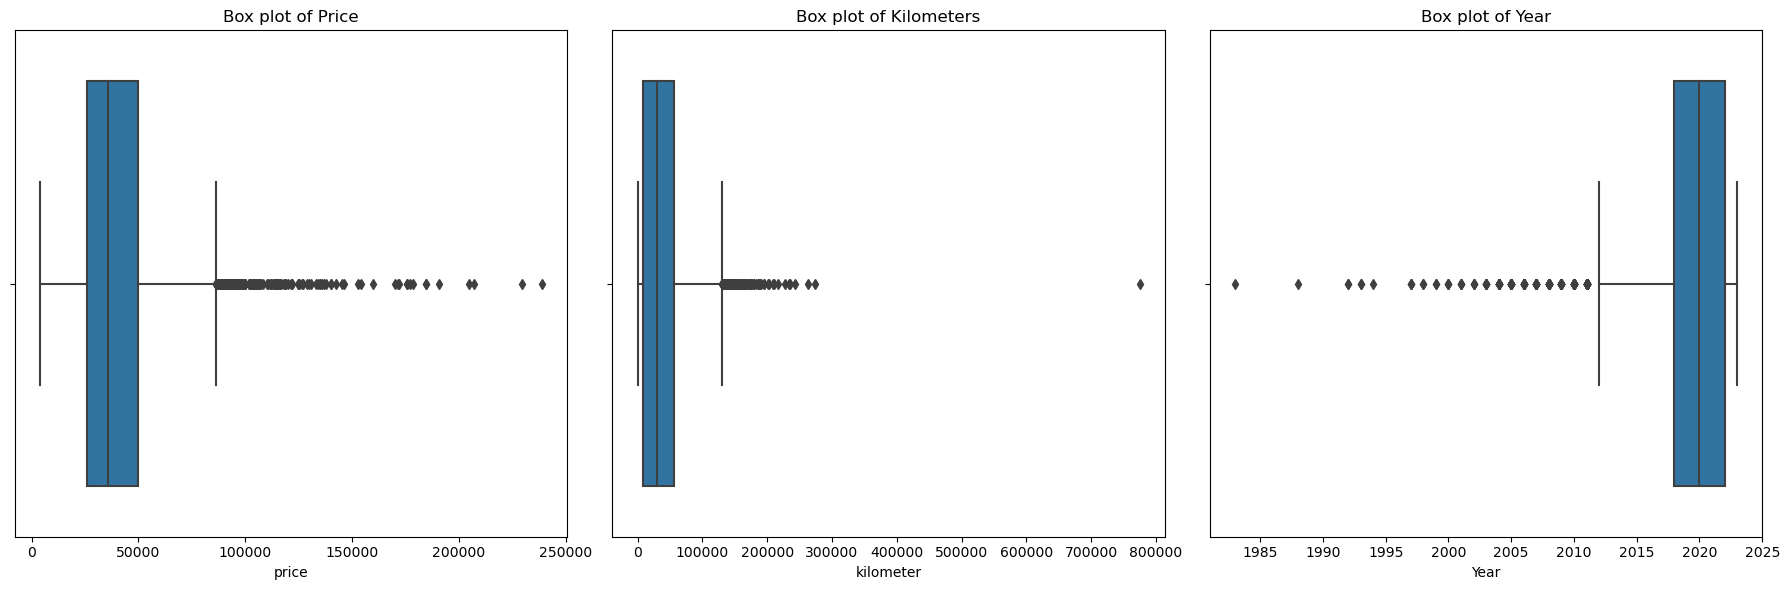

In [94]:
plt.figure(figsize=(18,6))

# Subplot 1 for price
plt.subplot(1, 3, 1)
sns.boxplot(x=df['price'])
plt.title('Box plot of Price')

# Subplot 2 for kilometer
plt.subplot(1, 3, 2)
sns.boxplot(x=df['kilometer'])
plt.title('Box plot of Kilometers')

# Subplot 3 for year
plt.subplot(1, 3, 3)
sns.boxplot(x=df['Year'])
plt.title('Box plot of Year')

plt.tight_layout()
plt.show()

By applying the IQR method, the code helps eliminate potential outliers from the 'price', 'kilometer', and 'Year' columns in the DataFrame. This process can improve the accuracy and reliability of subsequent data analysis or modeling tasks..


In [95]:
Q1 = df[['price', 'kilometer','Year']].quantile(0.25)
Q3 = df[['price', 'kilometer']].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[['price', 'kilometer','Year']] < (Q1 - 1.5 * IQR)) |(df[['price', 'kilometer','Year']] > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\tal66\AppData\Local\Temp\ipykernel_15772\1179532813.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df[['price', 'kilometer','Year']] < (Q1 - 1.5 * IQR)) |(df[['price', 'kilometer','Year']] > (Q3 + 1.5 * IQR))).any(axis=1)]
C:\Users\tal66\AppData\Local\Temp\ipykernel_15772\1179532813.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df[['price', 'kilometer','Year']] < (Q1 - 1.5 * IQR)) |(df[['price', 'kilometer','Year']] > (Q3 + 1.5 * IQR))).any(axis=1)]


The provided code creates a boxplot visualization to analyze the distribution and identify potential outliers in the 'price', 'mileage' and 'year' columns of the DataFrame.
The resulting visualization shows three side-by-side box plots, representing the distribution of values in the 'Price', 'Kilometer' and 'Year' columns. This helps identify any outliers, explore central tendency, and gain insights into the data distribution of these variables.



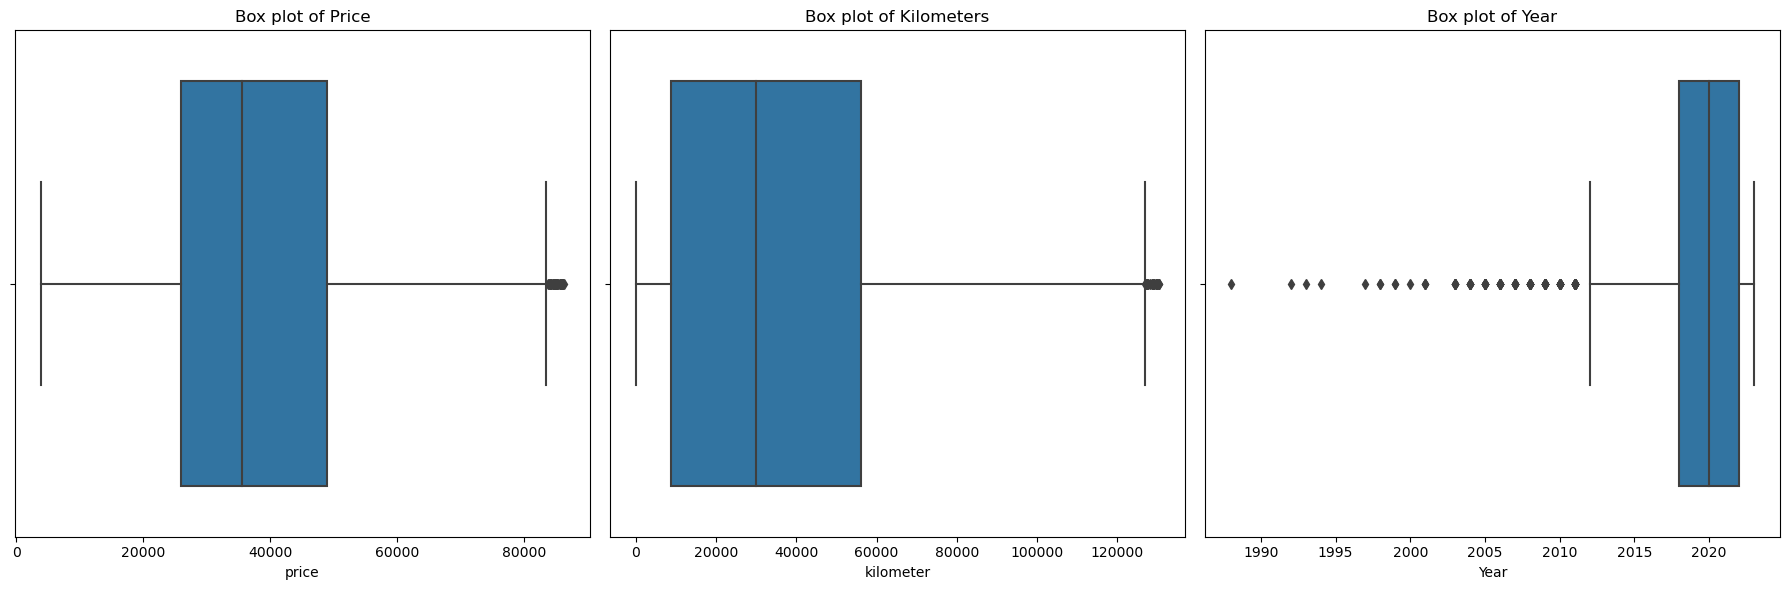

In [96]:
plt.figure(figsize=(18,6))

# Subplot 1 for price
plt.subplot(1, 3, 1)
sns.boxplot(x=df['price'])
plt.title('Box plot of Price')

# Subplot 2 for kilometer
plt.subplot(1, 3, 2)
sns.boxplot(x=df['kilometer'])
plt.title('Box plot of Kilometers')

# Subplot 3 for year
plt.subplot(1, 3, 3)
sns.boxplot(x=df['Year'])
plt.title('Box plot of Year')

plt.tight_layout()
plt.show()

The code ensures that missing values are handled, relevant columns are extracted, cleaned, and converted to appropriate data types. Duplicate rows are removed, resulting in a cleaned and prepared DataFrame for


In [97]:
df.replace(['', 'None', 'Information Unavailable'], np.nan, inplace=True)
df.dropna(inplace=True)

if 'Fuel consumption' in df.columns:
    df[['city_mileage', 'highway_mileage']] = df['Fuel consumption'].str.split(' / ', 1, expand=True)
    df['city_mileage'] = pd.to_numeric(df['city_mileage'].str.replace(' City', ''), errors='coerce')
    df['highway_mileage'] = pd.to_numeric(df['highway_mileage'].str.replace(' Highway', ''), errors='coerce')
    df = df.drop('Fuel consumption', axis=1)

if 'Engine' in df.columns:
    df[['Engine_volume', 'Engine_type']] = df['Engine'].str.split(' ', 1, expand=True)
    df['Engine_volume'] = df['Engine_volume'].str.replace('L', '').str.replace('Plug-in', '')
    df['Engine_volume'] = pd.to_numeric(df['Engine_volume'], errors='coerce')
    df = df.drop('Engine', axis=1)

if 'model' in df.columns:
    df[['Car_condition', 'Year', 'Make', 'Model', 'Extra_info']] = df['model'].str.split(' ', 4, expand=True)
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
    df = df.drop('model', axis=1)

df = df.drop_duplicates()
df = df.dropna()
df = df.convert_dtypes()

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5558 entries, 0 to 8085
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            5558 non-null   Int64  
 1   kilometer        5558 non-null   Int64  
 2   exterior color   5558 non-null   string 
 3   interior color   5558 non-null   string 
 4   Gearbox          5558 non-null   string 
 5   drive type       5558 non-null   string 
 6   Year             5558 non-null   Int64  
 7   manufacturer     5558 non-null   string 
 8   city_mileage     5558 non-null   Int64  
 9   highway_mileage  5558 non-null   Int64  
 10  Engine_volume    5558 non-null   Float64
 11  Engine_type      5558 non-null   string 
 12  Car_condition    5558 non-null   string 
 13  Make             5558 non-null   string 
 14  Model            5558 non-null   string 
 15  Extra_info       5558 non-null   string 
dtypes: Float64(1), Int64(5), string(10)
memory usage: 770.7 KB


This visualization allows you to examine the distribution and identify outliers for the variables 'city_mileage', 'highway_mileage', and 'Engine_volume' using box plots.


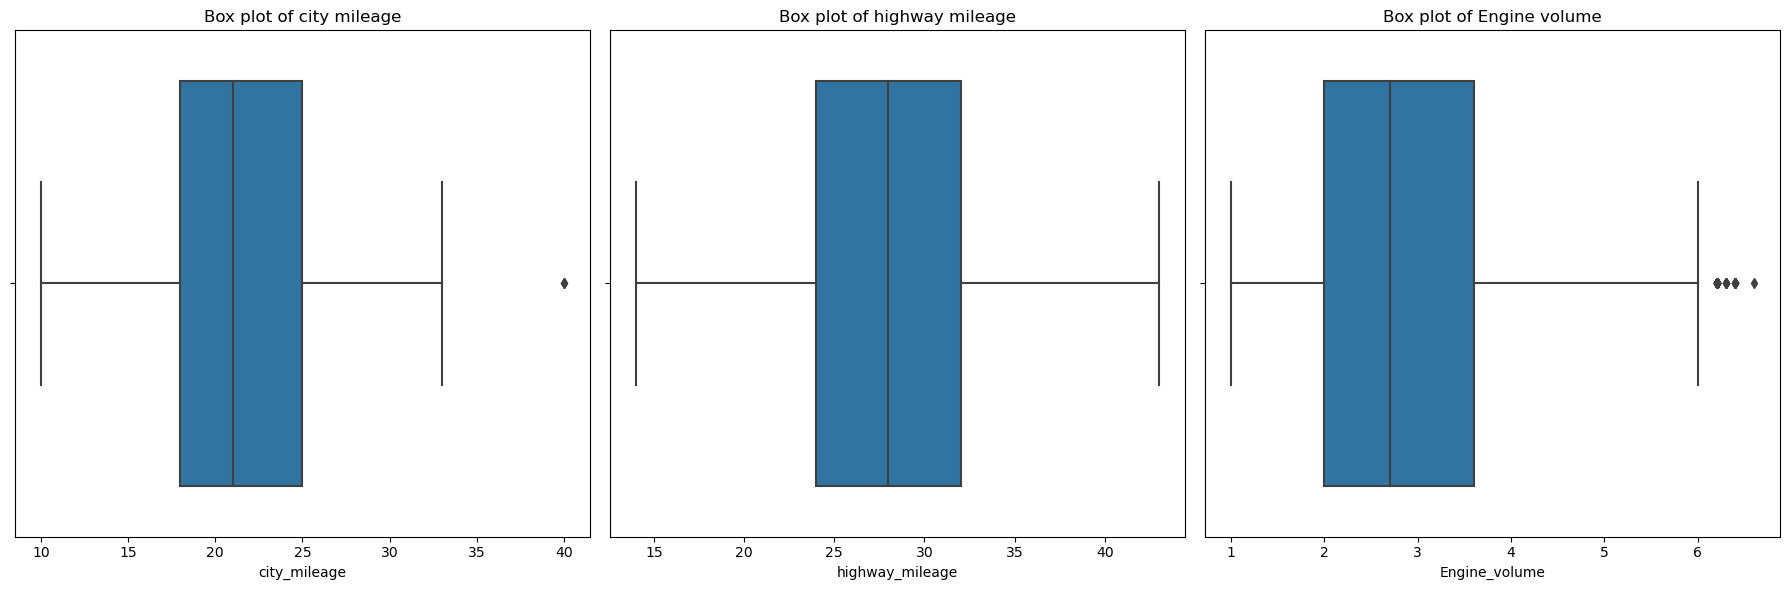

In [99]:
plt.figure(figsize=(18,6))

# Subplot 1 for price
plt.subplot(1, 3, 1)
sns.boxplot(x=df['city_mileage'])
plt.title('Box plot of city mileage')

# Subplot 2 for kilometer
plt.subplot(1, 3, 2)
sns.boxplot(x=df['highway_mileage'])
plt.title('Box plot of highway mileage')

# Subplot 3 for year
plt.subplot(1, 3, 3)
sns.boxplot(x=df['Engine_volume'])
plt.title('Box plot of Engine volume')

plt.tight_layout()
plt.show()

In [100]:
string_cols = df.select_dtypes(include='string').columns
df[string_cols] = df[string_cols].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5558 entries, 0 to 8085
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            5558 non-null   Int64  
 1   kilometer        5558 non-null   Int64  
 2   exterior color   5558 non-null   object 
 3   interior color   5558 non-null   object 
 4   Gearbox          5558 non-null   object 
 5   drive type       5558 non-null   object 
 6   Year             5558 non-null   Int64  
 7   manufacturer     5558 non-null   object 
 8   city_mileage     5558 non-null   Int64  
 9   highway_mileage  5558 non-null   Int64  
 10  Engine_volume    5558 non-null   Float64
 11  Engine_type      5558 non-null   object 
 12  Car_condition    5558 non-null   object 
 13  Make             5558 non-null   object 
 14  Model            5558 non-null   object 
 15  Extra_info       5558 non-null   object 
dtypes: Float64(1), Int64(5), object(10)
memory usage: 770.7+ KB


The resulting plot provides a visual comparison of price, kilometer, and year distribution across different manufacturers, as well as the price distribution for the top common exterior colors.


<Figure size 640x480 with 0 Axes>

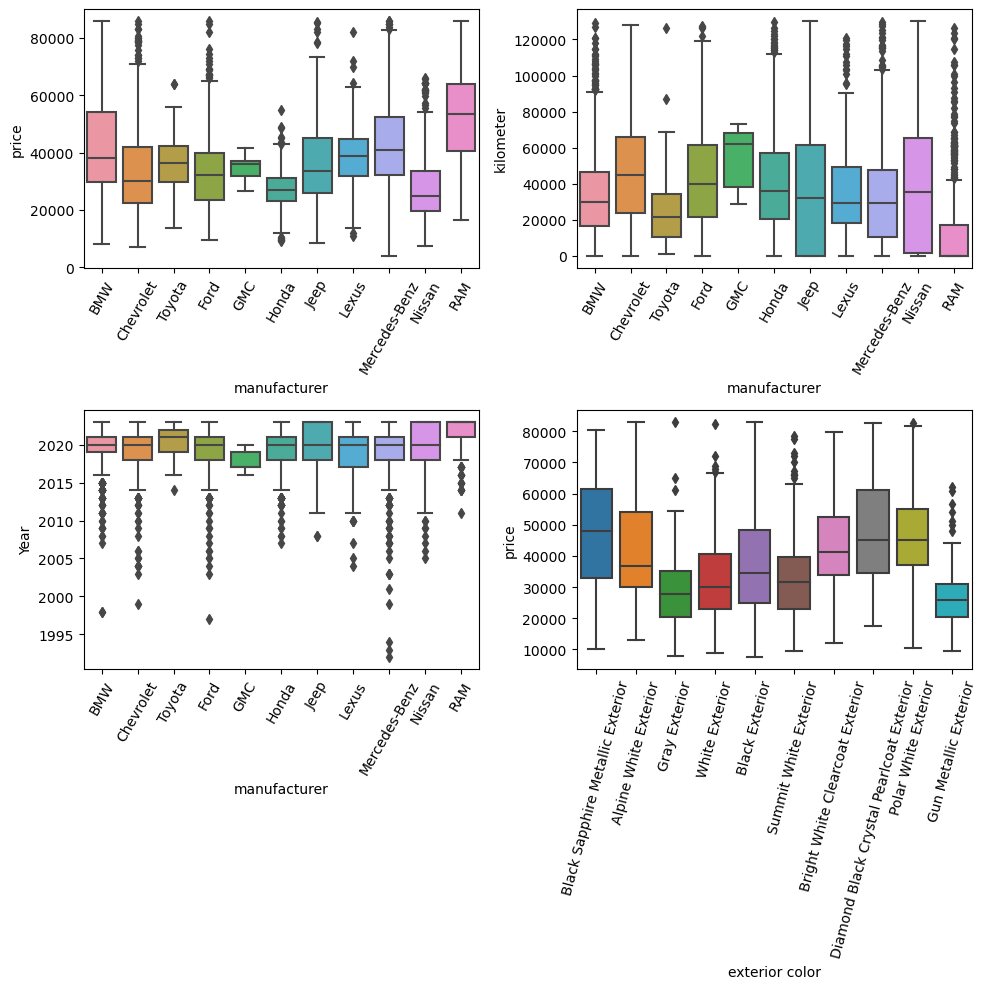

In [102]:
common_colors = df['exterior color'].value_counts().index[:10]
df_common_colors = df[df['exterior color'].isin(common_colors)]



plt.clf()
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
sns.boxplot(data=df, x='manufacturer', y='price', ax=axs[0, 0])
sns.boxplot(data=df, x='manufacturer', y='kilometer', ax=axs[0, 1])
sns.boxplot(data=df, x='manufacturer', y='Year', ax=axs[1, 0])
sns.boxplot(data=df_common_colors, x='exterior color', y='price', ax=axs[1, 1])

# Rotate x-axis labels
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=60)
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=60)
axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=60)
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=75)

plt.tight_layout()
plt.show()


The resulting pie chart provides a visual representation of the distribution of manufacturers in the dataset, with each slice representing a manufacturer and the percentage labels indicating the proportion of each manufacturer in the dataset.


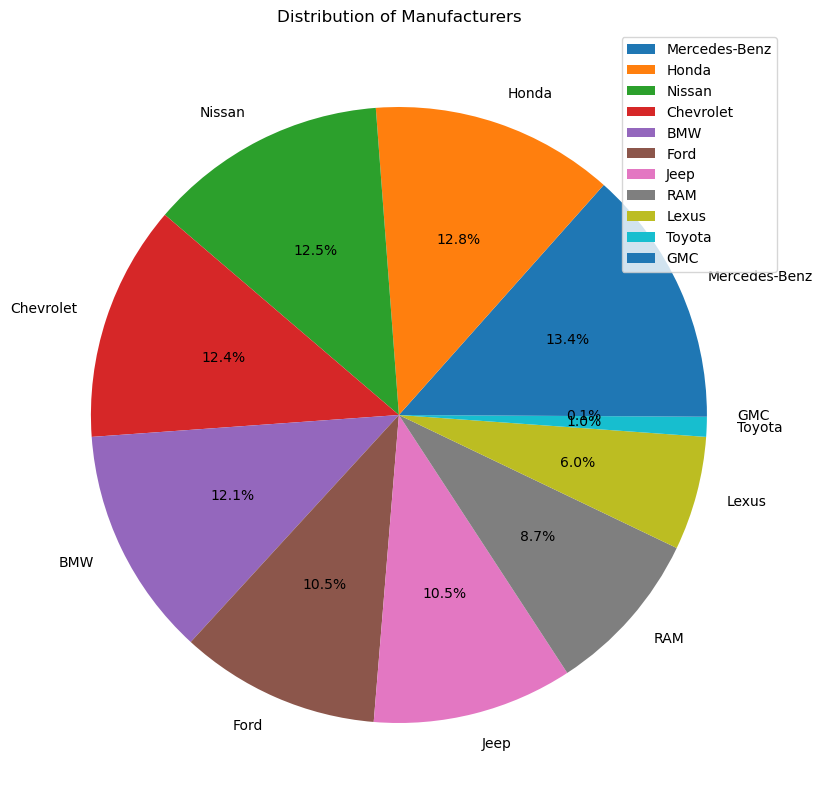

In [104]:
fig = plt.figure(figsize=(10, 10))

manufacturer_counts = df['manufacturer'].value_counts().sort_values(ascending=False)
manufacturer_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Manufacturers')
plt.ylabel('')  # Remove the y-axis label

# Create a custom legend based on the sorted manufacturer counts
plt.legend(labels=manufacturer_counts.index)

plt.show()

The resulting scatter plot shows the distribution of vehicle prices with respect to kilometers driven. Each point represents a data point in the dataset, and the scatter plot allows you to observe any potential patterns or trends between price and kilometers driven.


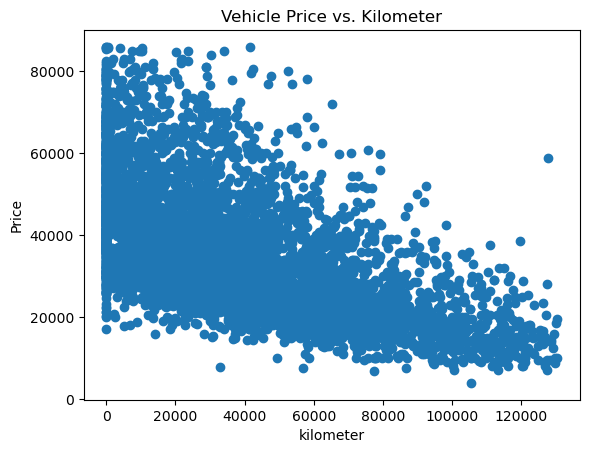

In [105]:
plt.scatter(df['kilometer'], df['price'])
plt.xlabel('kilometer')
plt.ylabel('Price')
plt.title('Vehicle Price vs. Kilometer')
plt.show() 

The resulting bar plot displays the average price of vehicles for each manufacturer. Each bar represents the average price for a specific manufacturer, allowing for easy comparison of average prices across different manufacturers.


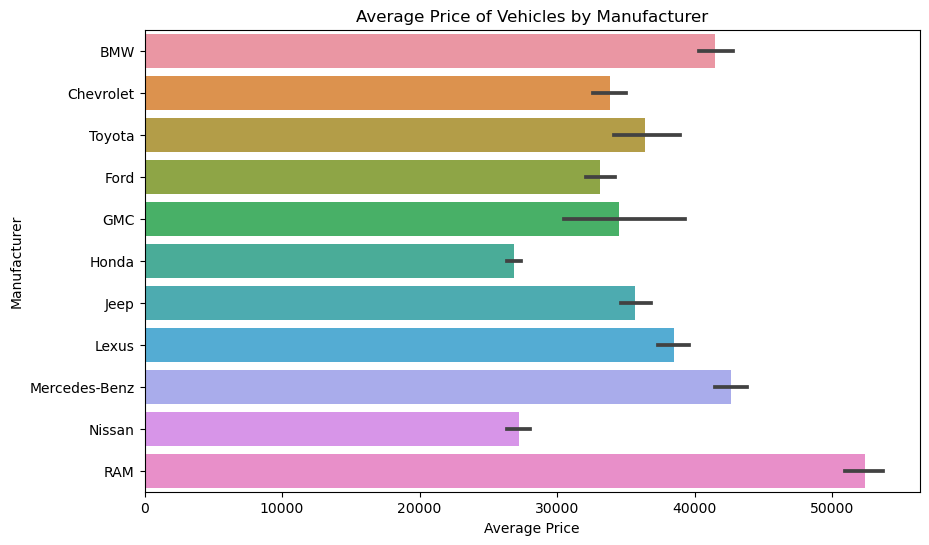

In [107]:
plt.figure(figsize=(10, 6))
sns.barplot(x='price', y='manufacturer', data=df)
plt.xlabel('Average Price')
plt.ylabel('Manufacturer')
plt.title('Average Price of Vehicles by Manufacturer')
plt.show()


The resulting scatter plot displays each data point representing the price of a vehicle, with the x-axis representing the manufacturer. The color of each data point corresponds to the manufacturer, allowing for visual differentiation of manufacturers and their respective price ranges.


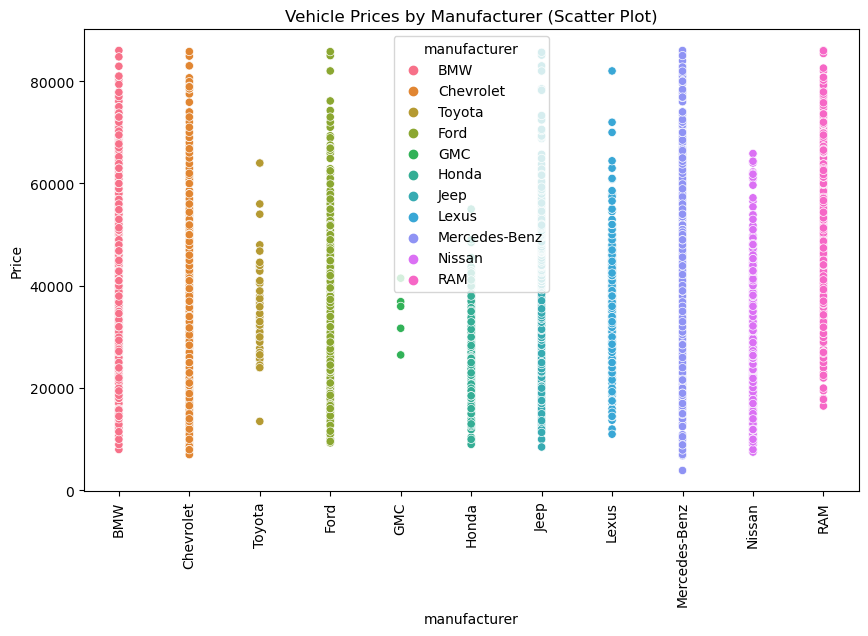

In [109]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='manufacturer', y='price', hue='manufacturer', data=df)
plt.xlabel('manufacturer')
plt.ylabel('Price')
plt.title('Vehicle Prices by Manufacturer (Scatter Plot)')
plt.xticks(rotation=90) 
plt.show()

The resulting 3D scatter plot shows the relationship between vehicle price, kilometer, and year, with each data point represented as a colored dot. The colors correspond to the manufacturers of the vehicles, allowing for visual differentiation of manufacturers in the 3D space.

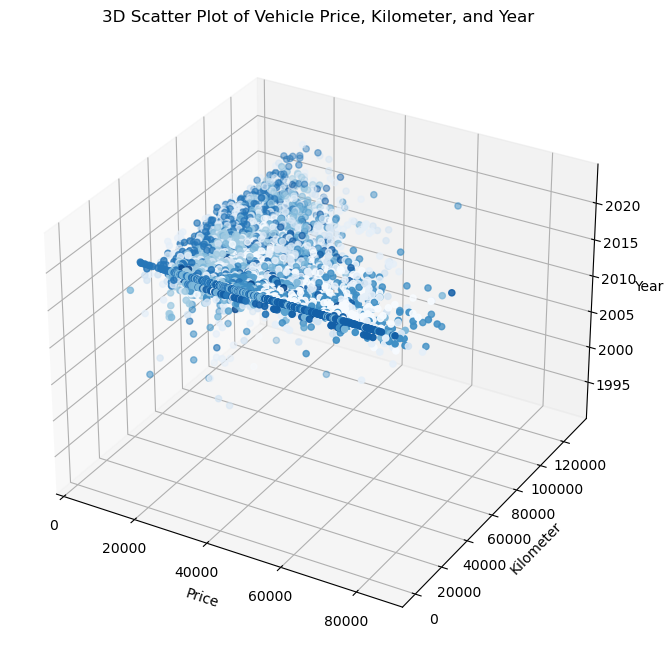

In [118]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
x = df['price']
y = df['kilometer']
z = df['Year']

manufacturers = pd.Categorical(df['manufacturer'])
color_map = cm.get_cmap('Blues')

scatter_colors = color_map(manufacturers.codes / len(manufacturers.categories))
ax.scatter(x, y, z, c=scatter_colors)

ax.set_xlabel('Price')
ax.set_ylabel('Kilometer')
ax.set_zlabel('Year')

plt.title('3D Scatter Plot of Vehicle Price, Kilometer, and Year')
plt.show()

In [119]:
df.describe()


,price,kilometer,Year,city_mileage,highway_mileage,Engine_volume
count,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000
mean,36255.843829,37254.969593,2019.494962,21.397085,28.367218,2.997193
std,15451.828858,30728.021359,3.079983,4.492343,5.513566,1.273356
min,3900.000000,0.000000,1992.000000,10.000000,14.000000,1.000000
25%,24988.000000,11701.250000,2018.000000,18.000000,24.000000,2.000000
50%,33491.000000,31376.500000,2020.000000,21.000000,28.000000,2.700000
75%,44787.500000,57672.500000,2022.000000,25.000000,32.000000,3.600000
max,86000.000000,130355.000000,2023.000000,40.000000,43.000000,6.600000


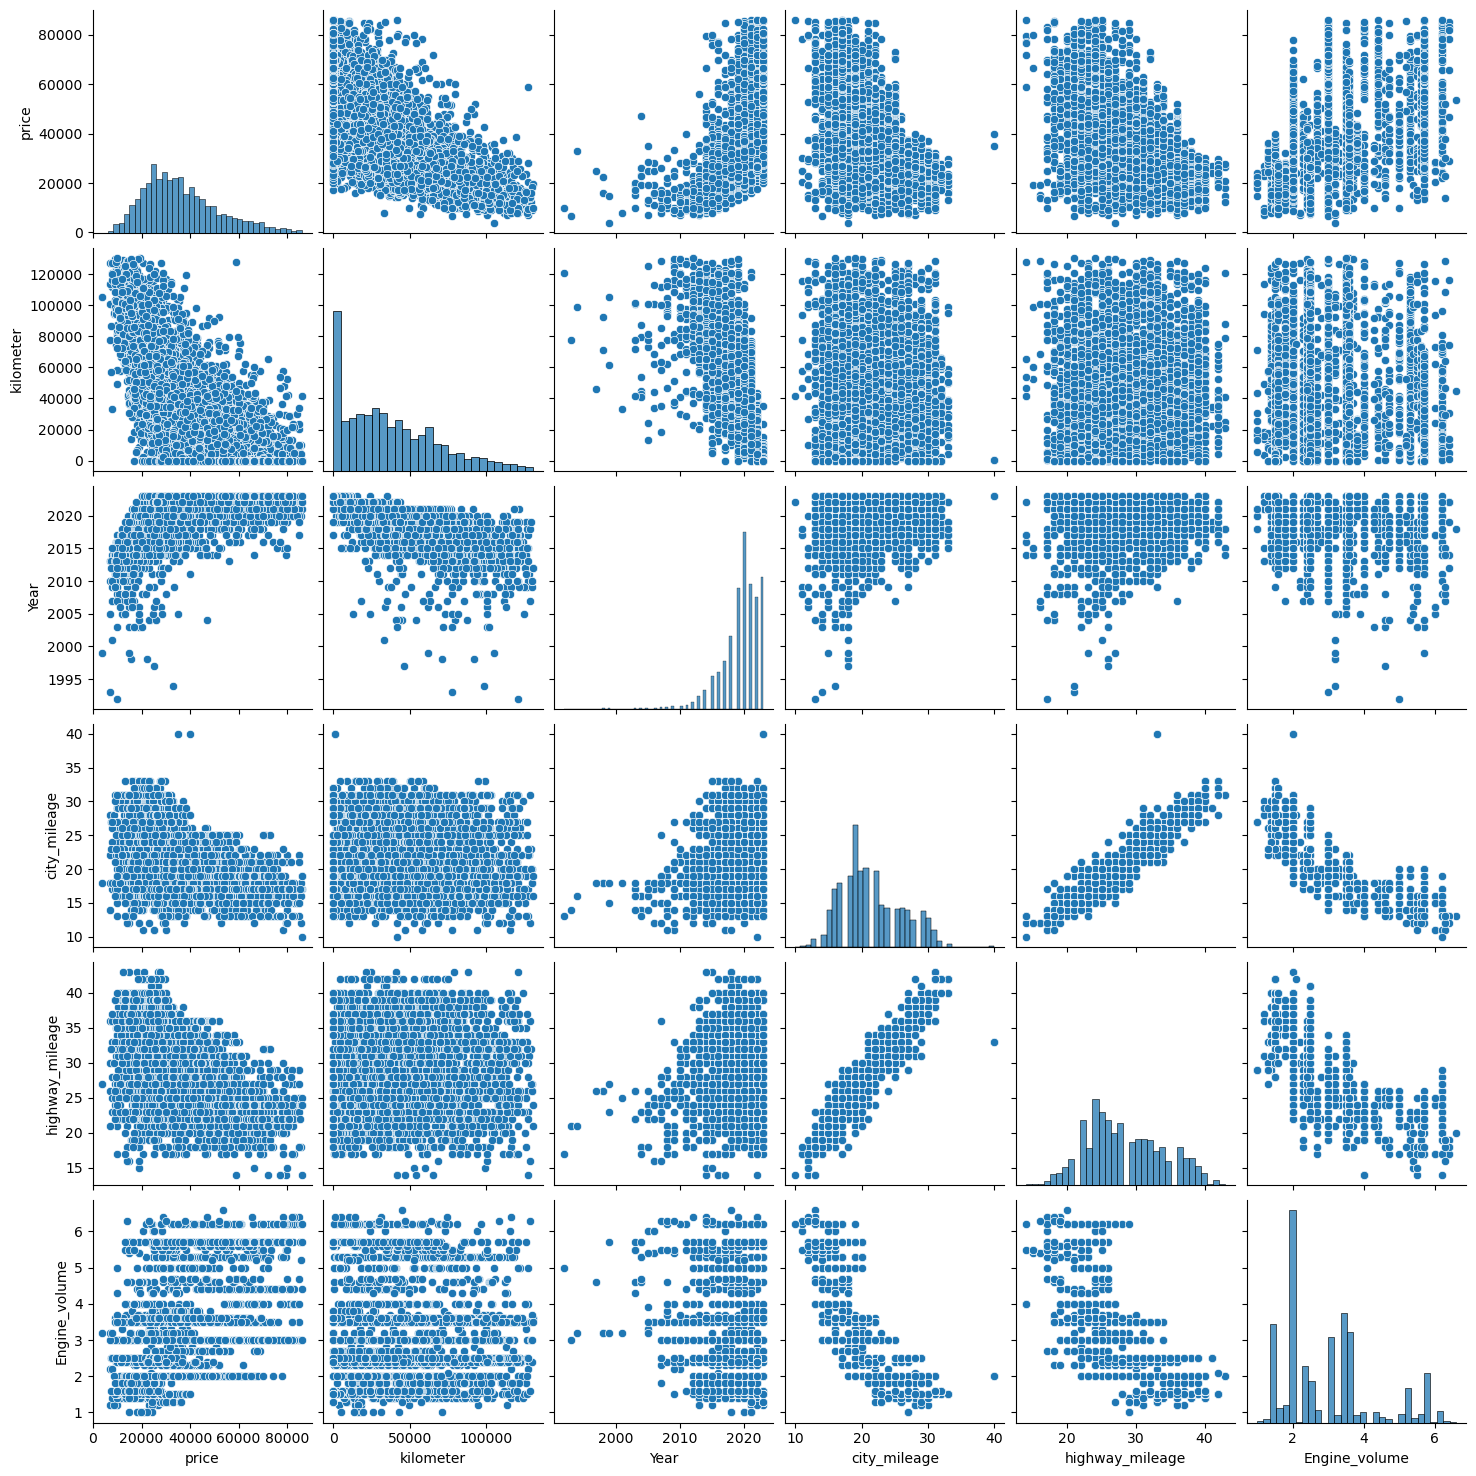

In [120]:
sns.pairplot(df)
plt.show()

The resulting box plot shows the distribution of prices for each drive type (front, rear, and all wheel). Each box represents the interquartile range (IQR) of the price data for a particular drive type, with the median marked by a horizontal line inside the box. The whiskers extend to the minimum and maximum values within 1.5 times the IQR, and any data points outside this range are considered outliers.

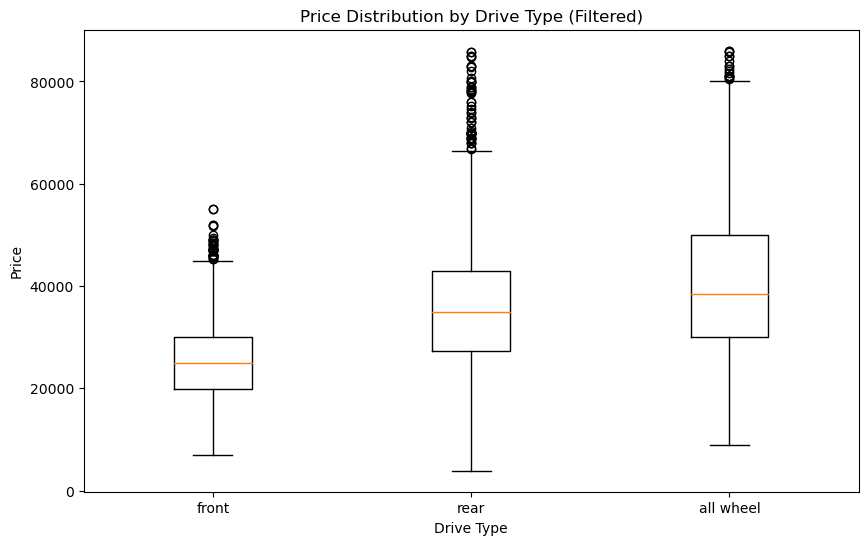

In [121]:
# Define the desired drive types
desired_drive_types = ['front', 'rear', 'all wheel']

# Filter the data based on the desired drive types
filtered_data = df[df['drive type'].str.contains('|'.join(desired_drive_types), case=False, na=False)]

# Convert 'price' column to numeric format and handle missing values

filtered_data = filtered_data.dropna(subset=['price'])
filtered_data.loc[:, 'price'] = pd.to_numeric(filtered_data['price'], errors='coerce')

# Extract the prices for each filtered drive type
price_data = []
drive_labels = []

for drive_type in desired_drive_types:
    drive_prices = filtered_data[filtered_data['drive type'].str.contains(drive_type, case=False, na=False)]['price']
    price_data.append(drive_prices)
    drive_labels.append(drive_type)

# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(price_data, labels=drive_labels)

# Add labels and title
plt.xlabel('Drive Type')
plt.ylabel('Price')
plt.title('Price Distribution by Drive Type (Filtered)')

# Display the plot
plt.show()

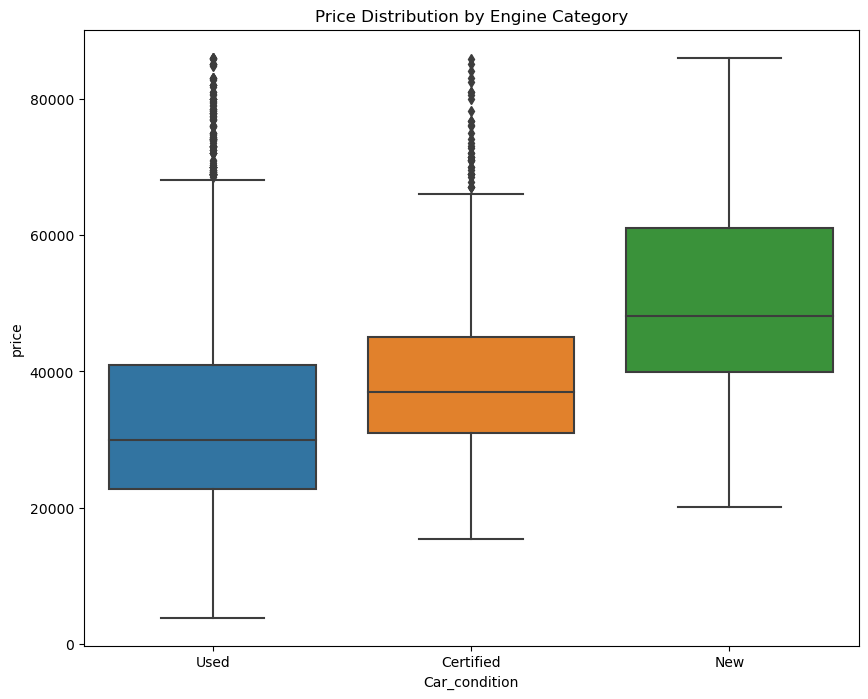

In [122]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Car_condition', y='price', data=df)
plt.title('Price Distribution by Engine Category')
plt.show()

The resulting bar plot will show the average price for each make (manufacturer) as a vertical bar. This allows for easy comparison of average prices between different makes.

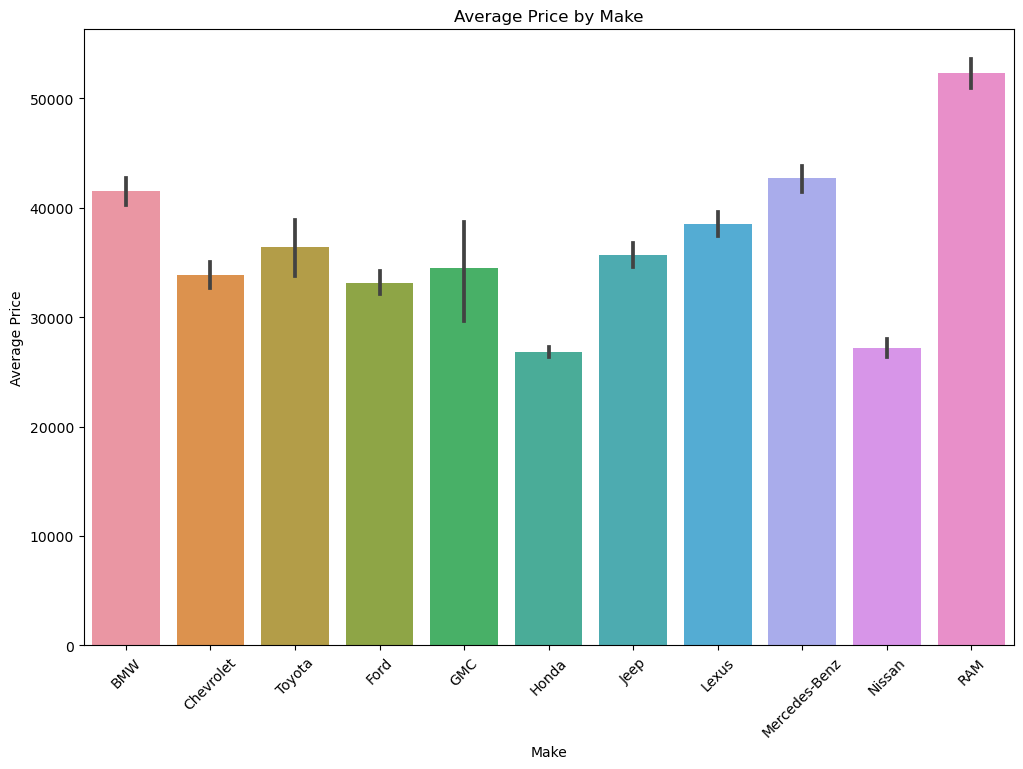

In [124]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Make', y='price', data=df)
plt.title('Average Price by Make')
plt.xlabel('Make')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


The resulting bar plot will show the average price for each make (manufacturer) as a vertical bar. This allows for easy comparison of average prices between different makes.

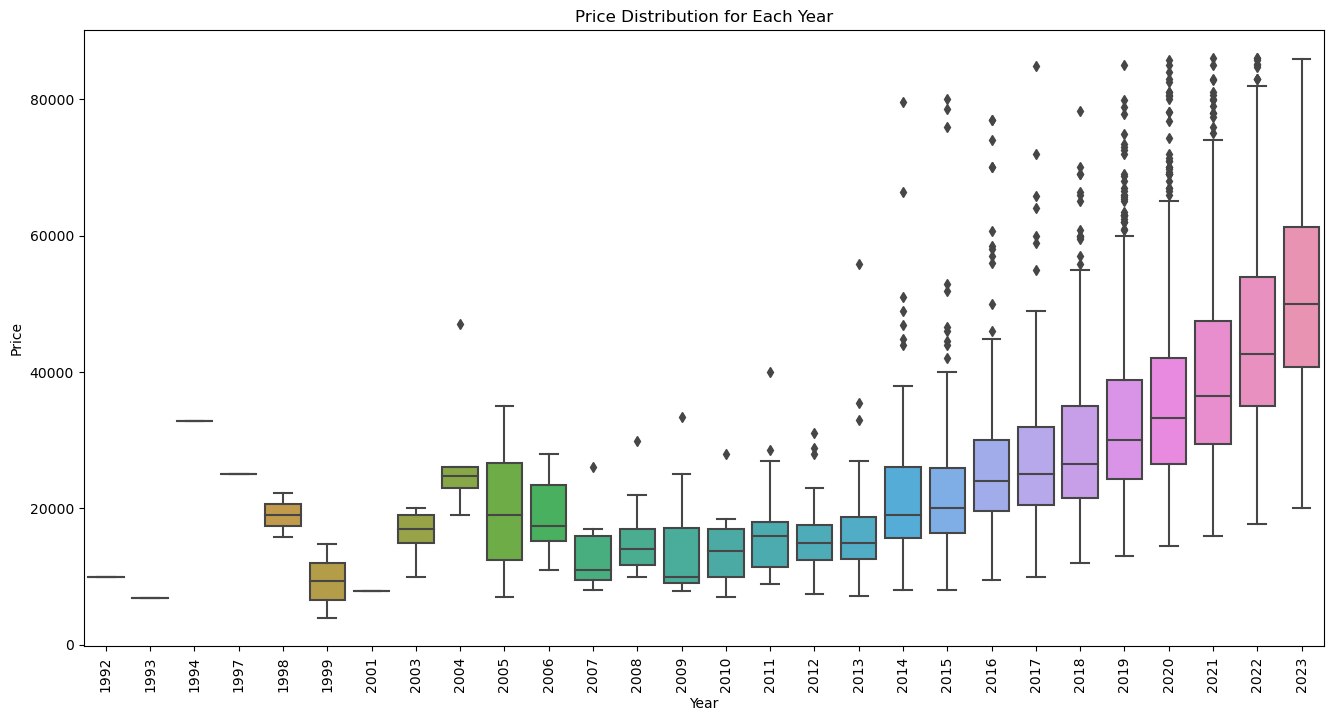

In [125]:
plt.figure(figsize=(16,8))

sns.boxplot(data=df, x='Year', y='price')

plt.title('Price Distribution for Each Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

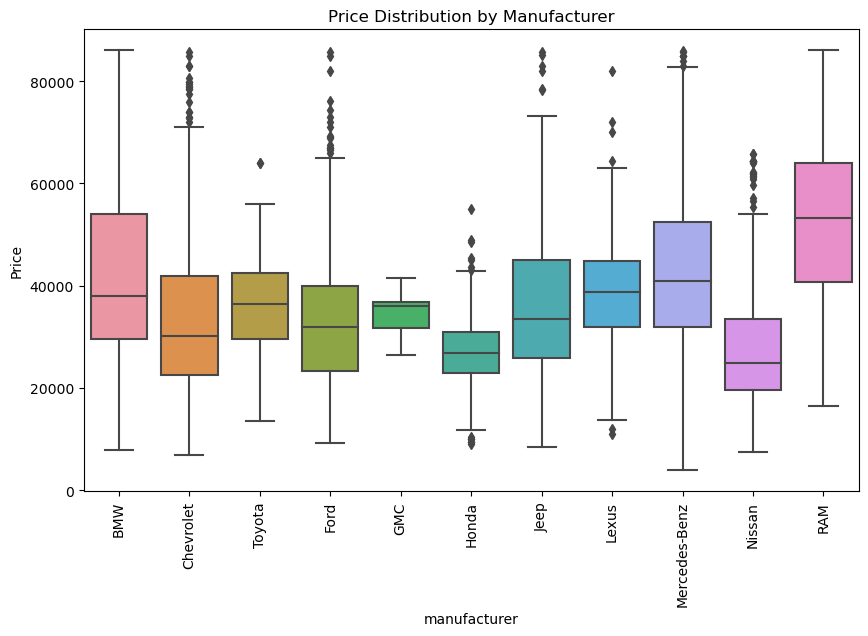

In [127]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.boxplot(x='manufacturer', y='price', data=df)

plt.title('Price Distribution by Manufacturer')
plt.xlabel('manufacturer')
plt.ylabel('Price')
plt.xticks(rotation=90) # Rotating the x-axis labels for better readability

plt.show()

The resulting box plot will show the distribution of prices for different engine types, with different drive types distinguished by color. This allow to analyze the price variation based on the simplified engine type and drive type categories.

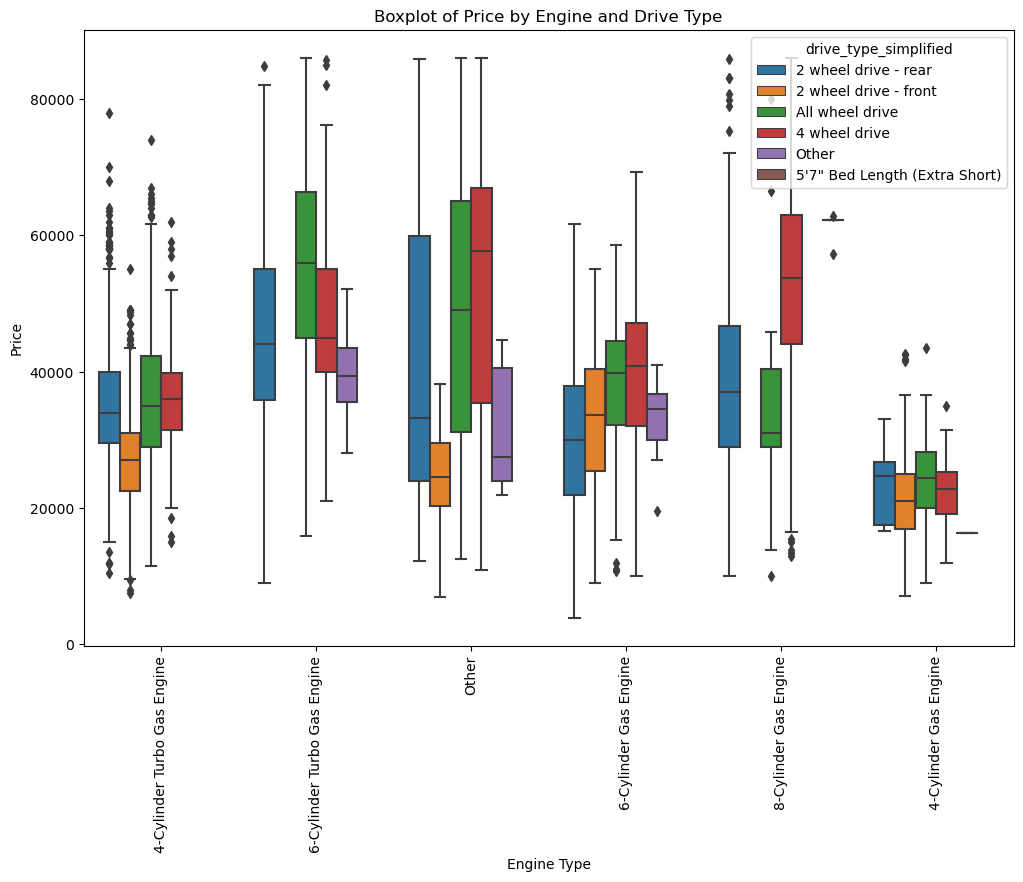

In [128]:
# Consider only the top 5 most common engine types
top_engines = df['Engine_type'].value_counts().nlargest(5).index
df['Engine_simplified'] = df['Engine_type'].where(df['Engine_type'].isin(top_engines), 'Other')

# Consider only the most common drive types
top_drive_types = df['drive type'].value_counts().nlargest(5).index
df['drive_type_simplified'] = df['drive type'].where(df['drive type'].isin(top_drive_types), 'Other')

# Now create the plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Engine_simplified', y='price', hue='drive_type_simplified', data=df)

plt.title('Boxplot of Price by Engine and Drive Type')
plt.xlabel('Engine Type')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()


The resulting box plot will show the distribution of prices for each manufacturer, allow to compare the price ranges and identify any potential variations between manufacturers. The x-axis represents the manufacturers, and the y-axis represents the price.

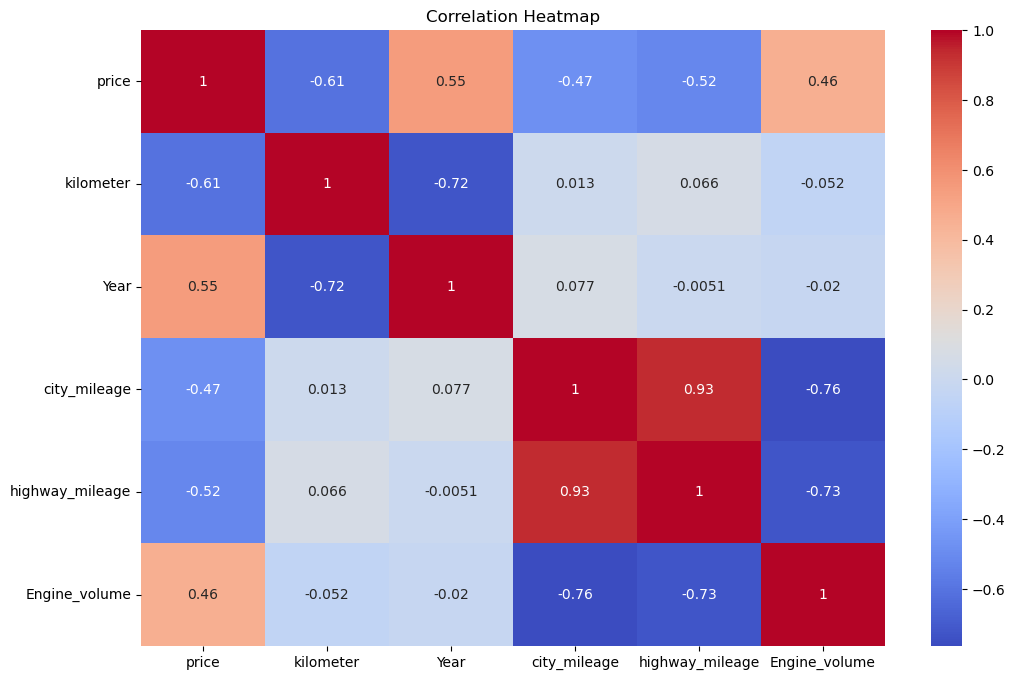

In [129]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


The resulting box plot will show the distribution of prices for each manufacturer, allow to compare the price ranges and identify any potential variations between manufacturers. The x-axis represents the manufacturers, and the y-axis represents the price.

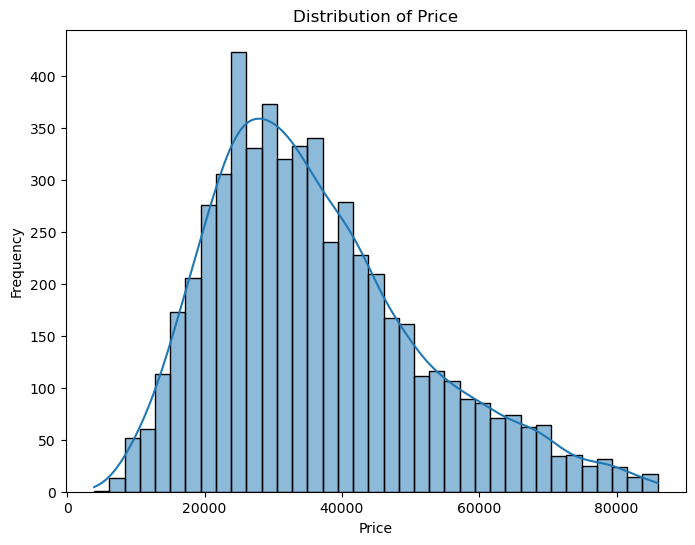

In [130]:
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [131]:
df2 = pd.get_dummies(df)
df2

,price,kilometer,Year,city_mileage,highway_mileage,Engine_volume,exterior color_Abyss Gray Metallic Exterior,exterior color_Admiral Blue Metallic Exterior,exterior color_Aegean Blue Metall Exterior,exterior color_Aegean Blue Metallic Exterior,...,Engine_simplified_6-Cylinder Gas Engine,Engine_simplified_6-Cylinder Turbo Gas Engine,Engine_simplified_8-Cylinder Gas Engine,Engine_simplified_Other,drive_type_simplified_2 wheel drive - front,drive_type_simplified_2 wheel drive - rear,drive_type_simplified_4 wheel drive,"drive_type_simplified_5'7"" Bed Length (Extra Short)",drive_type_simplified_All wheel drive,drive_type_simplified_Other
0,33987,22686,2020,23,34,2.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,23973,41679,2018,23,32,2.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,25999,27659,2018,24,35,2.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,41999,5206,2022,25,34,2.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,43886,7984,2022,23,32,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8078,48710,10,2023,20,25,3.6,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
8079,61750,10,2023,19,24,5.7,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
8080,62550,10,2023,19,24,5.7,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
8081,47390,5,2023,20,25,3.6,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


# Machine learning
In the machine learning portion of your project, you will use algorithms and techniques to build predictive models based on your dataset. The goal is that by means of these models on previous data we can learn patterns and relationships between the input features such as vehicle specifications, mileage, etc. and the target variable (the price of the car).


The code snippet prepares the data for machine learning by splitting it into input features (X) and the target variable (y). It further divides the data into training and testing sets, with 80% for training and 20% for testing. This enables training a machine learning model on the training data and evaluating its performance on unseen testing data.

In [132]:
X = df2.drop('price', axis=1)
y = df2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


The code is using linear regression, a machine learning algorithm, to predict the prices of vehicles. 

In [133]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_error = mean_squared_error(y_test, lr_pred)
lr_r2_score = r2_score(y_test, lr_pred)
print(f"Linear Regression R2 Score: {lr_r2_score}")

Linear Regression R2 Score: -48341311286.82123


C:\Users\tal66\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
C:\Users\tal66\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


In [134]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm = SVR(kernel='linear')
svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)
svm_error = mean_squared_error(y_test, svm_pred)
svm_r2_score = r2_score(y_test, svm_pred)
print(f"SVM R2 Score: {svm_r2_score}")


SVM R2 Score: 0.7755637719401544


C:\Users\tal66\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
C:\Users\tal66\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


In [135]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_error = mean_squared_error(y_test, rf_pred)
rf_r2_score = r2_score(y_test, rf_pred)
print(f"Random Forest R2 Score: {rf_r2_score}")

Random Forest R2 Score: 0.9143455643873724


C:\Users\tal66\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
C:\Users\tal66\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


In [136]:
dfExample = df2.copy()
Real_values = dfExample['price']
dfExample = dfExample.drop(columns = ['price'])
y_pred_example = rf.predict(dfExample)
dfExamplePred = pd.DataFrame({'predicted':y_pred_example.round(2),'real':Real_values})
dfExamplePred['percentage'] = ((pd.DataFrame({'min_percentage': dfExamplePred['predicted'] / dfExamplePred['real'], 'max_percentage': dfExamplePred['real'] / dfExamplePred['predicted']})).min(axis=1) * 100).round(2)

    
dfExamplePred

,predicted,real,percentage
0,33402.22,33987,98.28
1,25199.27,23973,95.13
2,26384.55,25999,98.54
7,43139.64,41999,97.36
9,43272.43,43886,98.60
...,...,...,...
8078,45899.01,48710,94.23
8079,58718.87,61750,95.09
8080,58718.87,62550,93.88
8081,44724.43,47390,94.38


In [137]:
dfExamplePred[dfExamplePred['percentage']>=95].count()

predicted     4104
real          4104
percentage    4104
dtype: int64

The code is creating a figure with three subplots to compare the true values with the predicted values of three different regression models: Linear Regression, SVM, and Random Forest. The scatter plots show the relationship between the true values (y_test) and the predicted values (lr_pred, svm_pred, rf_pred) for each model. The x-axis and y-axis are both displayed on a logarithmic scale. The blue line represents a perfect prediction, where the true values and predicted values are equal. The subplots provide a visual comparison of the performance of each model in predicting the target variable.

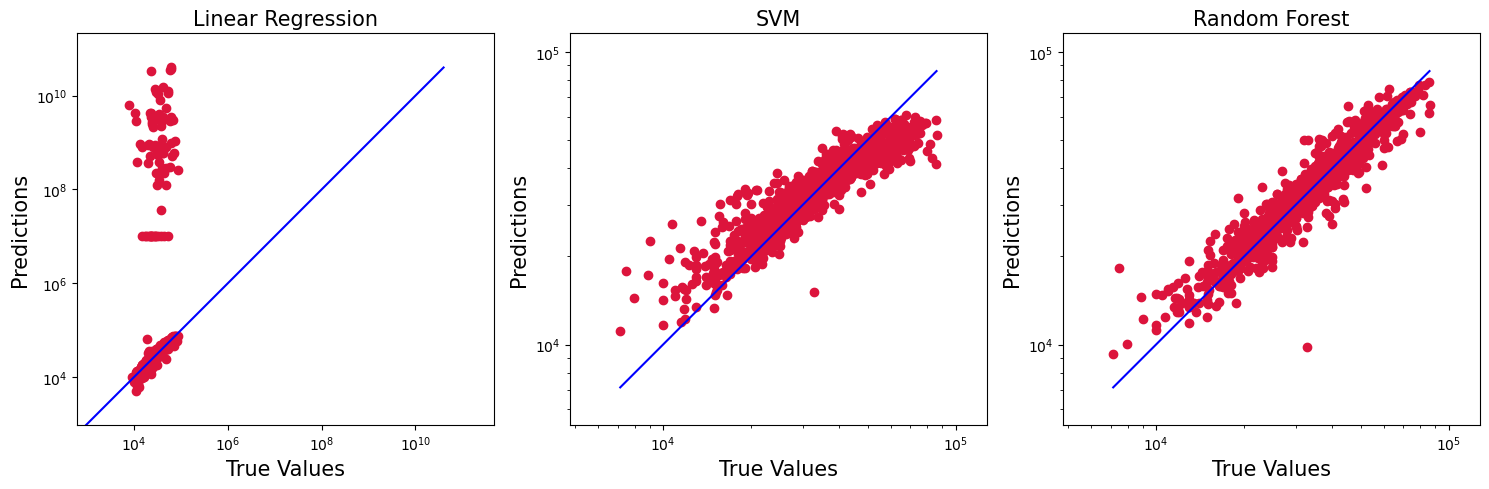

In [138]:
plt.figure(figsize=(15, 5))

# Subplot 1: Predictions before improving
plt.subplot(1, 3, 1)
plt.scatter(y_test, lr_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(y_test), max(lr_pred))
p2 = min(min(y_test), min(lr_pred))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('Linear Regression', fontsize=15)
plt.axis('equal')

# Subplot 2: Predictions after improving
plt.subplot(1, 3, 2)
plt.scatter(y_test, svm_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(y_test), max(svm_pred))
p2 = min(min(y_test), min(svm_pred))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('SVM', fontsize=15)
plt.axis('equal')

# Subplot 3: Predictions after super improving
plt.subplot(1, 3, 3)
plt.scatter(y_test, rf_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(y_test), max(rf_pred))
p2 = min(min(y_test), min(rf_pred))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('Random Forest', fontsize=15)
plt.axis('equal')

plt.tight_layout()
plt.show()